# Загрузка необходимых библиотек для работы


In [1]:
!pip install seaborn numpy pandas matplotlib scikit-learn tensorflow

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime
%matplotlib inline
from matplotlib.pyplot import hist
from pandas import read_excel, DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow import keras 
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Dropout

Подгружаем данные и объединяем их

In [2]:
df_bp = pd.read_excel(r"C:\Users\markovtsova\datasets\X_bp.xlsx", index_col=0)
df_nup = pd.read_excel(r"C:\Users\markovtsova\datasets\X_nup.xlsx", index_col=0)

In [3]:
df = df_bp.merge(df_nup, left_index=True, right_index=True, how='inner')

## DataFrame по базальто-пластику и угле-пластиковым накладкам


In [5]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 936 entries, 1.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки 

In [6]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Посмотрим являются ли признаки числовыми или категориальными

In [7]:
df_numeric = df.select_dtypes(include=[np.number]) # Числовые признаки
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Соотношение матрица-наполнитель' 'Плотность, кг/м3'
 'модуль упругости, ГПа' 'Количество отвердителя, м.%'
 'Содержание эпоксидных групп,%_2' 'Температура вспышки, С_2'
 'Поверхностная плотность, г/м2' 'Модуль упругости при растяжении, ГПа'
 'Прочность при растяжении, МПа' 'Потребление смолы, г/м2'
 'Угол нашивки, град' 'Шаг нашивки' 'Плотность нашивки']


In [8]:
df_non_numeric = df.select_dtypes(exclude=[np.number]) # Категориальные (нечисловые) признаки
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

[]


Категориальных признаков в наборе данных нет


# Анализ и визуализация данных

Построим гистограммы и даиграммы с размахом ("ящик с усами")


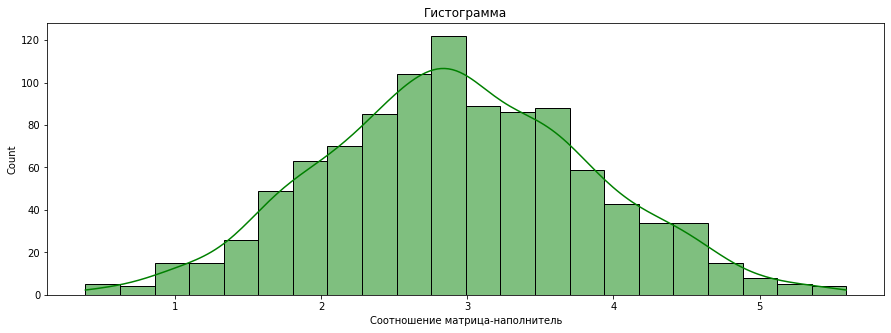

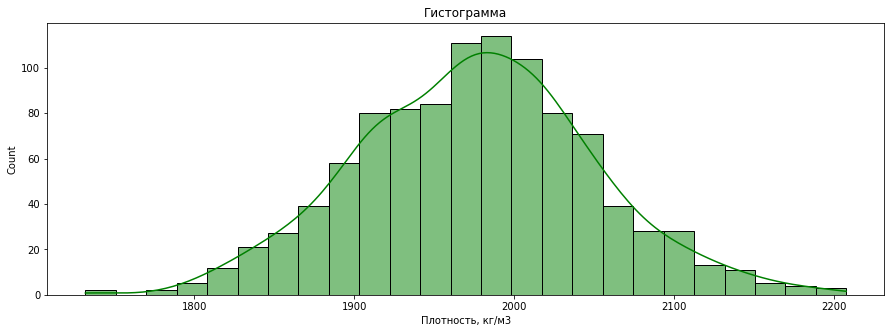

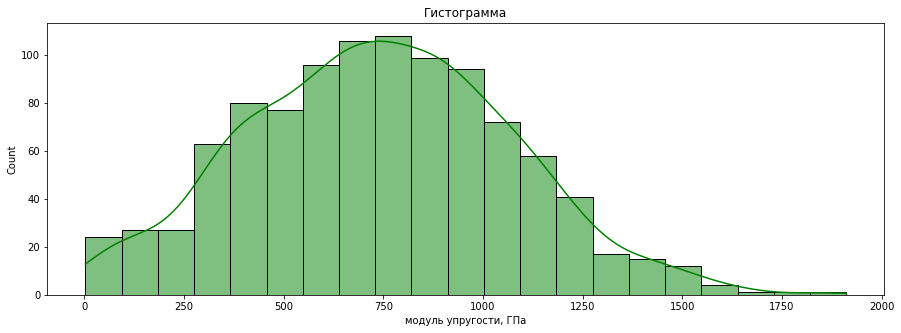

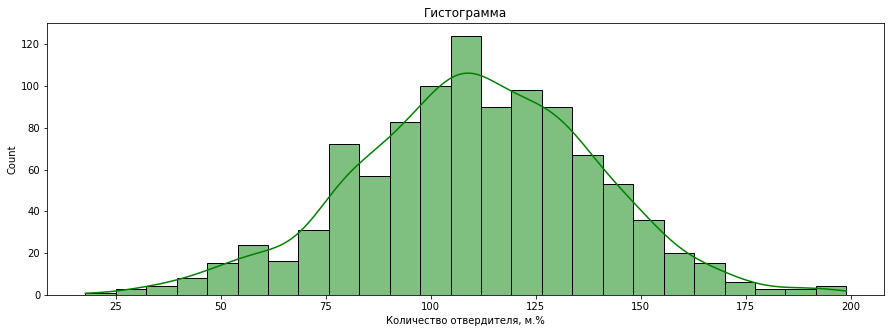

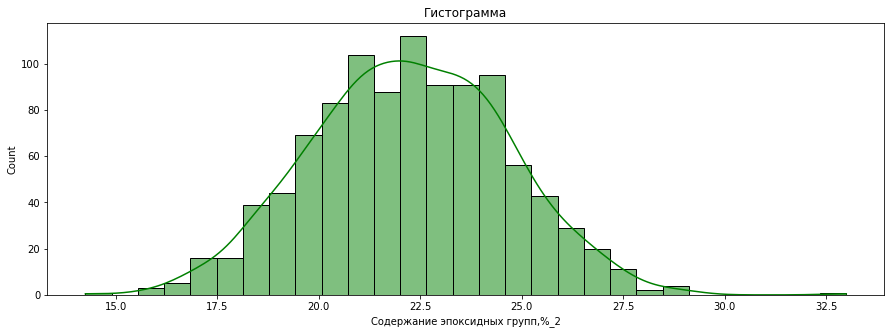

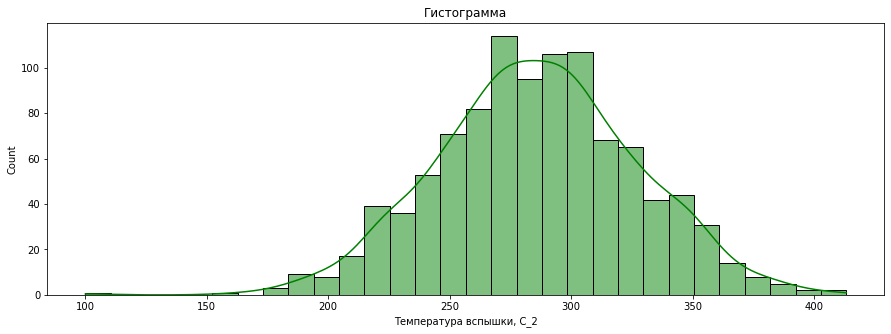

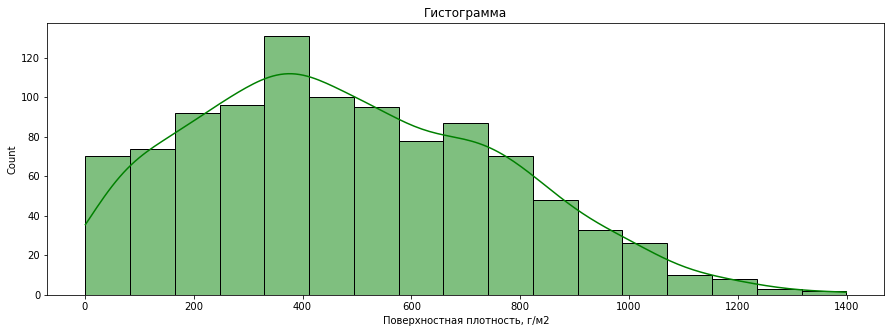

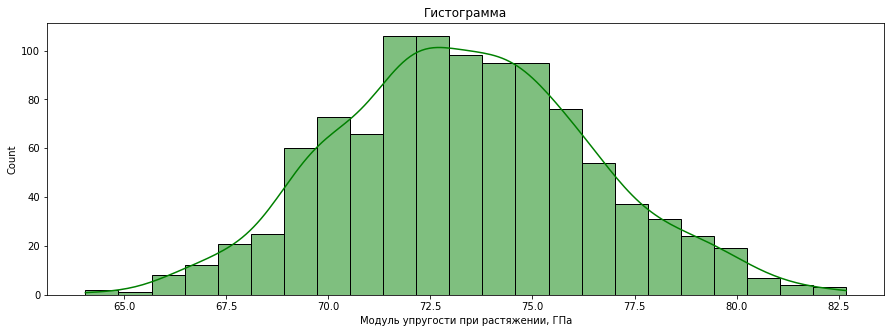

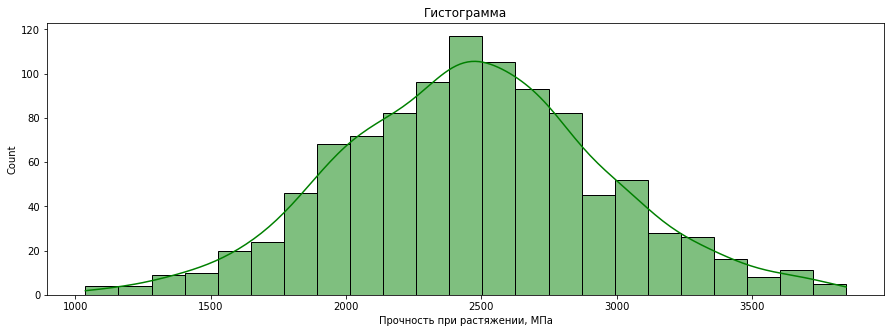

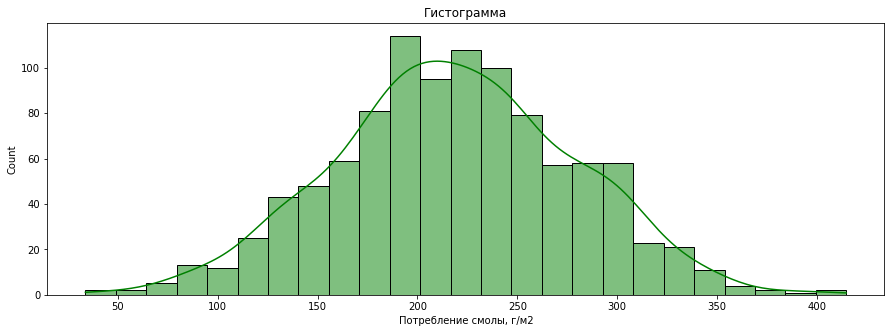

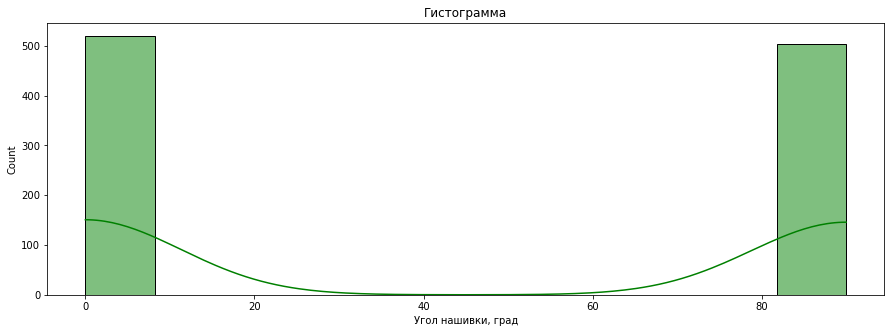

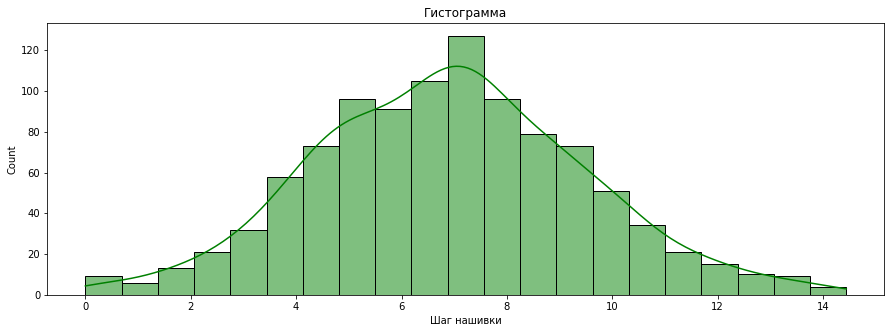

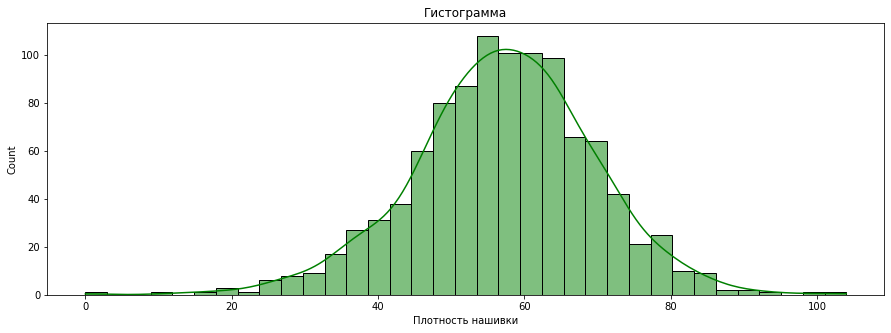

In [9]:
for col in df.columns:
    plt.figure(figsize=(15, 5))
    plt.title("Гистограмма")
    sns.histplot(data=df[col], color='green', kde=True)
    plt.show()

Все распределения являются непрерывными, кроме распределения по параметру "Угол нашивки, град" (дискретное распределение). 
Все непрерывные распределения близки в нормальному, кроме распределения по параметру "Поверхностная плотность, г/м2", смещение влево



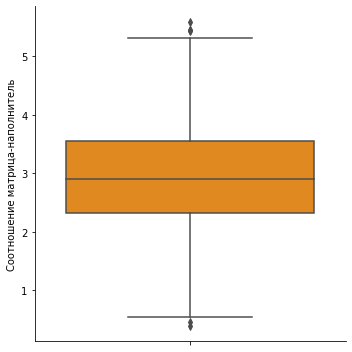

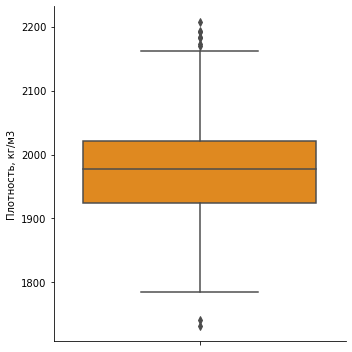

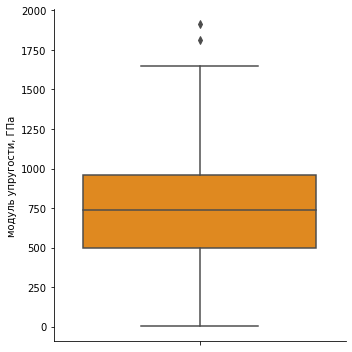

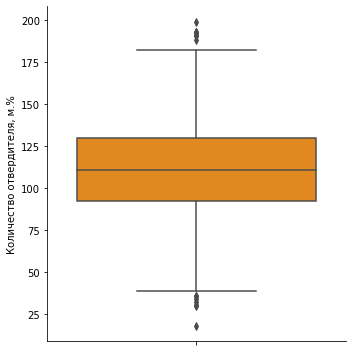

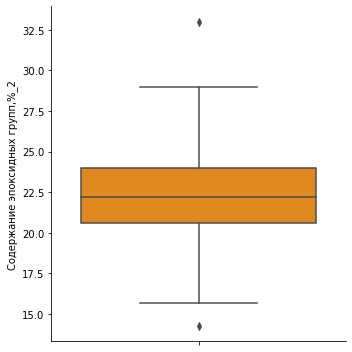

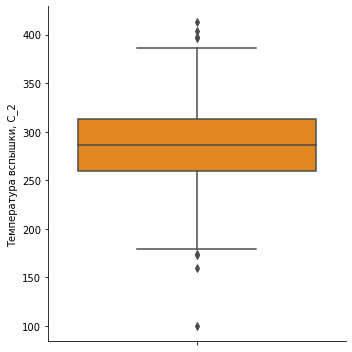

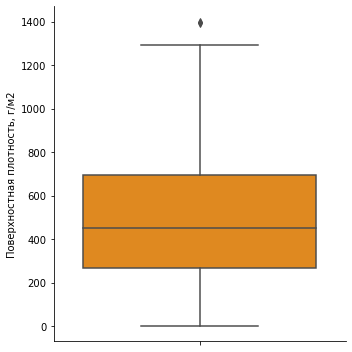

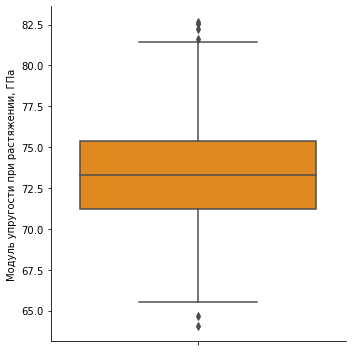

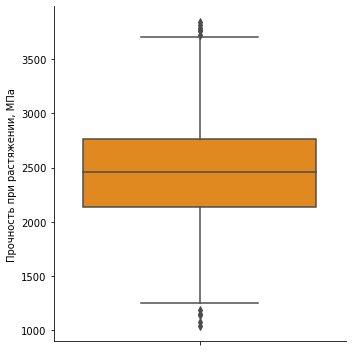

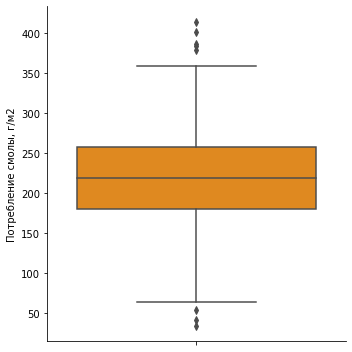

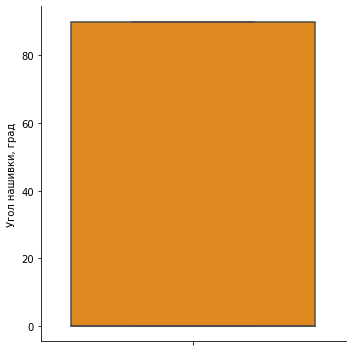

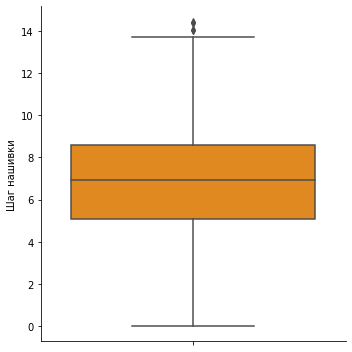

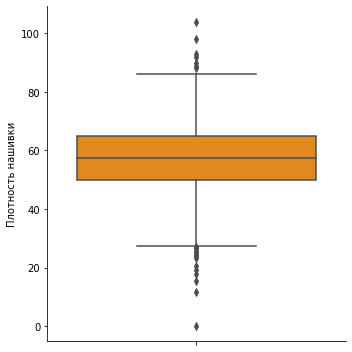

In [10]:
for col in df.columns:
    sns.catplot(kind='box', y=col, data=df, color='darkorange')


Диаграммы с размахом указывают на наличие выбросов

Строим парные графики

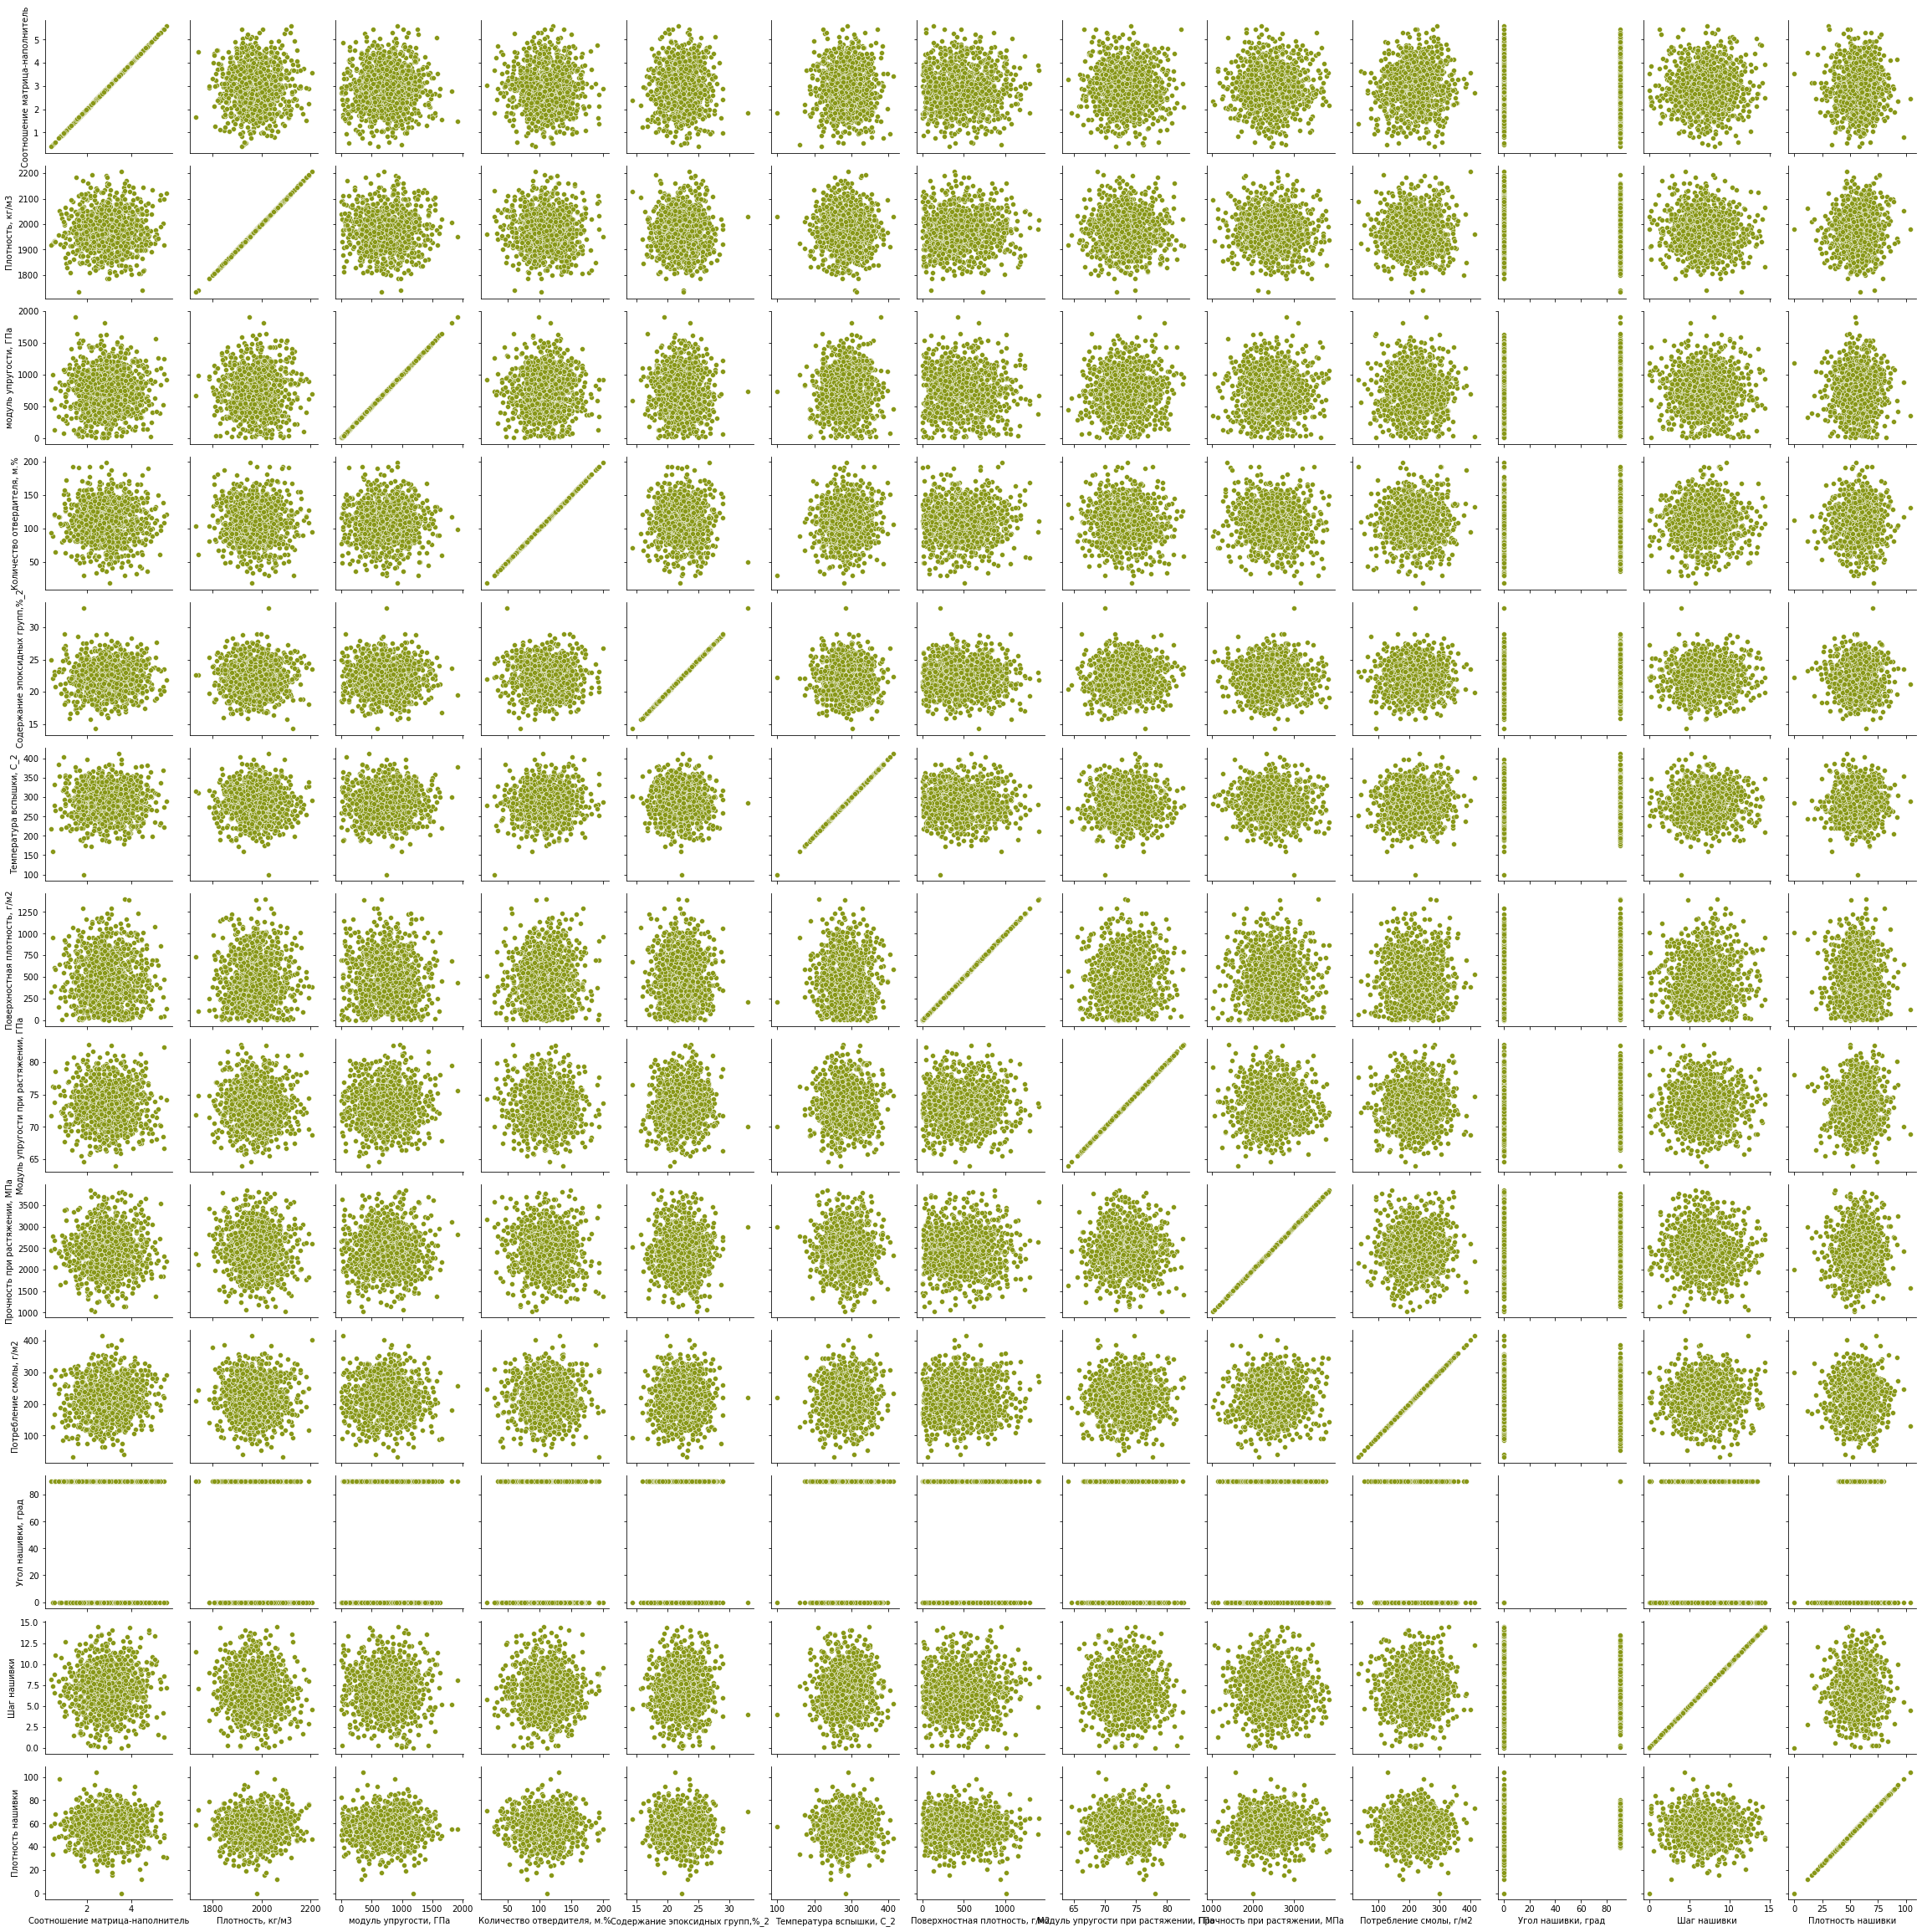

In [11]:
cols = df.columns
g = sns.PairGrid(df[cols], height=2.5)
g.map(sns.scatterplot, color='xkcd:baby shit green')

Тепловая карта корреляции Пирсона

<AxesSubplot:>

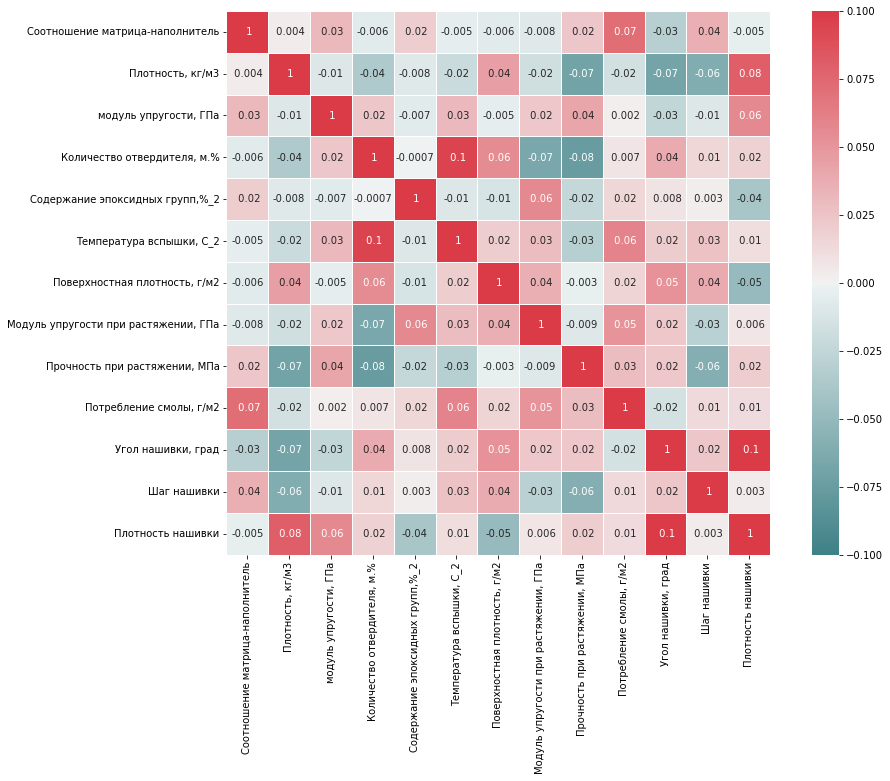

In [12]:
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt=' .1g', cmap=cmap, vmin=-.1, vmax=.1, center=0, linewidth=1, square=True)


Тепловая карта указывает на то, как признаки коррелириую между собой

Высокая положительная корреляция наблюдается у пар:

*   Количество отвердителя, м.% -> Температура вспышки, С_2;
*   Угол нашивки, град -> Плотность нашивки;
*   Плотность, кг/м3 -> Плотность нашивки;
*   Соотношение матрица-наполнитель -> Потребление смолы, г/м2

Корреляция около 0, что указывает на отсутствие линейной зависимости

In [13]:
CorrKoef = df.corr()
df.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

## Предобработка данных

Проверим данные на тепловой карте пропущенных значений


<AxesSubplot:>

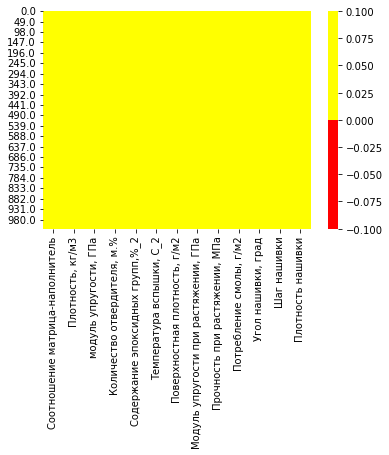

In [14]:
colours = ['red', 'yellow'] # Желтый цвет - нет пропуска данных, красный - пропуск данных
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

В дополнении к карте составим процентный список пропущенных данных

In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки, град - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


Закодируем параметр "Угол нашивки, град" с помощью LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

Проверяем на дубли

In [6]:
df.duplicated().sum()

0

Проверим количество выбросов по каждому признаку и удалим их

In [7]:
for x in df.columns:
  q75,q25 = np.percentile(df.loc[:,x],[75,25])
  intr_qr = q75-q25
  
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  df.loc[df[x] < min,x] = np.nan
  df.loc[df[x] > max,x] = np.nan

In [8]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [9]:
df = df.dropna(axis = 0) # Удаляем выбросы
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [11]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
5.0                            2.767918       2000.000000   
6.0                            2.569620       1910.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
1.0                738.736842                    50.000000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
5.0                748.000000                   111.860000   
6.0                807.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1.0                           23.750000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
5.0                           22.267857                284.615385   
6.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
5.0                        210.000000                             70.000000   
6.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
5.0                       3000.000000               220.000000   
6.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

Нормализация

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_nm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_nm.head(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.447061   
1                         0.274768          0.651097               0.447061   
2                         0.466552          0.651097               0.455721   
3                         0.465836          0.571539               0.452685   
4                         0.424236          0.332865               0.488508   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   
3                     0.511257                         0.495653   
4                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   
3                  0.509164                        0.16223   
4                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.280303                        0.71259   
1                              0.280303                        0.71259   
2                              0.280303                        0.71259   
3                              0.280303                        0.71259   
4                              0.280303                        0.71259   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.529221                 0.0     0.289334           0.557156  
1                 0.529221                 0.0     0.362355           0.335840  
2                 0.529221                 0.0     0.362355           0.506083  
3                 0.529221                 0.0     0.362355           0.557156  
4                 0.529221                 0.0     0.362355           0.727399

In [23]:
df_nm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       936.0  0.498933  0.187489  0.0   
Плотность, кг/м3                      936.0  0.502695  0.187779  0.0   
модуль упругости, ГПа                 936.0  0.446764  0.199583  0.0   
Количество отвердителя, м.%           936.0  0.504664  0.188865  0.0   
Содержание эпоксидных групп,%_2       936.0  0.491216  0.180620  0.0   
Температура вспышки, С_2              936.0  0.516059  0.190624  0.0   
Поверхностная плотность, г/м2         936.0  0.373733  0.217078  0.0   
Модуль упругости при растяжении, ГПа  936.0  0.488647  0.191466  0.0   
Прочность при растяжении, МПа         936.0  0.495706  0.188915  0.0   
Потребление смолы, г/м2               936.0  0.521141  0.195781  0.0   
Угол нашивки, град                    936.0  0.511752  0.500129  0.0   
Шаг нашивки                           936.0  0.502232  0.183258  0.0   
Плотность нашивки                     936.0  0.513776  0.191342  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.372274  0.494538  0.629204  1.0  
Плотность, кг/м3                      0.368517  0.511229  0.624999  1.0  
модуль упругости, ГПа                 0.301243  0.447061  0.580446  1.0  
Количество отвердителя, м.%           0.376190  0.506040  0.637978  1.0  
Содержание эпоксидных групп,%_2       0.367716  0.489382  0.623410  1.0  
Температура вспышки, С_2              0.386128  0.515980  0.646450  1.0  
Поверхностная плотность, г/м2         0.205619  0.354161  0.538683  1.0  
Модуль упругости при растяжении, ГПа  0.359024  0.485754  0.615077  1.0  
Прочность при растяжении, МПа         0.365149  0.491825  0.612874  1.0  
Потребление смолы, г/м2               0.392067  0.523766  0.652447  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372211  0.504258  0.624604  1.0  
Плотность нашивки                     0.390482  0.516029  0.638842  1.0

# Модели регрессионного анализа для "Модуля упругости при растяжении, ГПа"

Разделим данные на обучающую, тестовую




In [24]:
df1 = df_nm.copy()

In [25]:
X_1 = df1.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y_1 = df1['Модуль упругости при растяжении, ГПа']

In [26]:
X_1

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.274768          0.651097               0.447061   
1                           0.274768          0.651097               0.447061   
2                           0.466552          0.651097               0.455721   
3                           0.465836          0.571539               0.452685   
4                           0.424236          0.332865               0.488508   
..                               ...               ...                    ...   
931                         0.361662          0.444480               0.552781   
932                         0.607674          0.704373               0.268550   
933                         0.573391          0.498274               0.251612   
934                         0.662497          0.748688               0.448724   
935                         0.684036          0.280923               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.079153                         0.607435   
1                       0.630983                         0.418887   
2                       0.511257                         0.495653   
3                       0.511257                         0.495653   
4                       0.511257                         0.495653   
..                           ...                              ...   
931                     0.337550                         0.333908   
932                     0.749605                         0.294428   
933                     0.501991                         0.623085   
934                     0.717585                         0.267818   
935                     0.632264                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.509164                       0.162230   
1                    0.583596                       0.162230   
2                    0.509164                       0.162230   
3                    0.509164                       0.162230   
4                    0.509164                       0.162230   
..                        ...                            ...   
931                  0.703458                       0.161609   
932                  0.362087                       0.271207   
933                  0.334063                       0.572959   
934                  0.466417                       0.496511   
935                  0.588206                       0.587373   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                         0.712590                 0.529221   
1                         0.712590                 0.529221   
2                         0.712590                 0.529221   
3                         0.712590                 0.529221   
4                         0.712590                 0.529221   
..                             ...                      ...   
931                       0.463043                 0.207613   
932                       0.452087                 0.182974   
933                       0.575296                 0.585446   
934                       0.334513                 0.451779   
935                       0.654075                 0.443749   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                   0.0     0.289334           0.557156  
1                   0.0     0.362355           0.335840  
2                   0.0     0.362355           0.506083  
3                   0.0     0.362355           0.557156  
4                   0.0     0.362355           0.727399  
..                  ...          ...                ...  
931                 1.0     0.660014           0.336177  
932                 1.0     0.768759           0.450768  
933                 1.0     0.301102           0.687046  
934                 1.0     0.458245           0.527552  
935                 1.0     0.441137   

In [27]:
#Делим выборку
X_1_test, X_1_train, y_1_test, y_1_train = train_test_split(X_1, y_1, test_size=0.3, random_state=42) 

In [28]:
print("Размер тренировочного датасета на входе:", X_1_train.shape)
print("Размер тестового датасета на входе:", X_1_test.shape)
print("Размер тренировочного датасета на выходе:", y_1_train.shape)
print("Размер тестового датасета на выходе:", y_1_test.shape)

Размер тренировочного датасета на входе: (281, 12)
Размер тестового датасета на входе: (655, 12)
Размер тренировочного датасета на выходе: (281,)
Размер тестового датасета на выходе: (655,)


Сформируем модель, которая всегда выдает среднее значение по тестовой выборке

In [29]:
np.mean((y_1_test - np.mean(y_1_test))*(y_1_test - np.mean(y_1_test)))

0.03741359751577873

## LinearRegression

In [30]:
lreg = LinearRegression()

In [31]:
lreg.fit(X_1_train, y_1_train)

LinearRegression()

In [32]:
lreg.score(X_1_train, y_1_train)
lreg.score(X_1_test, y_1_test)
print("Train score:", lreg.score(X_1_train, y_1_train))
print("Test score:", lreg.score(X_1_test, y_1_test))

Train score: 0.025479055410648543
Test score: -0.015458603416670158


In [33]:
lreg.predict(X_1_test)

array([0.53881021, 0.48463637, 0.52486559, 0.47571581, 0.46370715,
       0.52287657, 0.51467643, 0.5029433 , 0.52113705, 0.48387588,
       0.52951586, 0.53970181, 0.54270964, 0.49613754, 0.47929187,
       0.49275608, 0.48884167, 0.49494585, 0.54103242, 0.50611882,
       0.4502764 , 0.48303265, 0.5015333 , 0.51749744, 0.48474805,
       0.47086551, 0.48131115, 0.48203514, 0.47620307, 0.50028462,
       0.45798993, 0.46383362, 0.50115034, 0.50884646, 0.5034804 ,
       0.44652465, 0.4443379 , 0.49974927, 0.45373421, 0.50026929,
       0.50937029, 0.47971756, 0.53055465, 0.45169108, 0.51017782,
       0.50499343, 0.53103021, 0.44721475, 0.49880403, 0.48353119,
       0.48449453, 0.51868652, 0.53464605, 0.51353062, 0.51480341,
       0.46469484, 0.46831903, 0.50072202, 0.4847091 , 0.52369502,
       0.52939252, 0.4945948 , 0.51977525, 0.48521697, 0.50776771,
       0.51664767, 0.48444654, 0.51764069, 0.50906162, 0.48281566,
       0.49380416, 0.51512936, 0.51392894, 0.43002317, 0.52405

In [34]:
np.mean((y_1_test - np.mean(y_1_test))*(y_1_test - np.mean(y_1_test)))

0.03741359751577873

In [35]:
np.mean((y_1_test - lreg.predict(X_1_test))*(y_1_test - lreg.predict(X_1_test)))

0.03799195948216605

In [36]:
R2 = r2_score(y_1_train, lreg.predict(X_1_train))
MAE = mean_absolute_error(y_1_train, lreg.predict(X_1_train))
MSE = mean_squared_error(y_1_train, lreg.predict(X_1_train))
RMSE = np.sqrt(mean_squared_error(y_1_train, lreg.predict(X_1_train)))

In [37]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0255, MAE: 0.1480, MSE: 0.0337, RMSE: 0.1837


In [38]:
R2 = r2_score(y_1_test, lreg.predict(X_1_test))
MAE = mean_absolute_error(y_1_test, lreg.predict(X_1_test))
MSE = mean_squared_error(y_1_test, lreg.predict(X_1_test))
RMSE = np.sqrt(mean_squared_error(y_1_test, lreg.predict(X_1_test)))

In [39]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0155, MAE: 0.1560, MSE: 0.0380, RMSE: 0.1949


Визуализируем результат сравнения тестовых и предсказанных значений

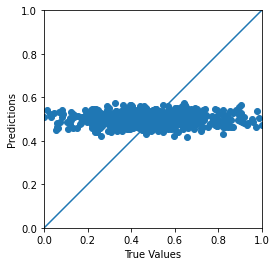

In [40]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, lreg.predict(X_1_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [41]:
train_results={}
train_results['LinearRegression'] = (r2_score(y_1_train, lreg.predict(X_1_train)), 
                                  mean_absolute_error(y_1_train, lreg.predict(X_1_train)), 
                                  mean_squared_error(y_1_train, lreg.predict(X_1_train)), 
                                  np.sqrt(mean_squared_error(y_1_train, lreg.predict(X_1_train))))

In [42]:
test_results={}
test_results['LinearRegression'] = (r2_score(y_1_test, lreg.predict(X_1_test)), 
                                  mean_absolute_error(y_1_test, lreg.predict(X_1_test)), 
                                  mean_squared_error(y_1_test, lreg.predict(X_1_test)), 
                                  np.sqrt(mean_squared_error(y_1_test, lreg.predict(X_1_test))))

## Ridge Regression

In [43]:
ridge = Ridge(random_state= 42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

GSCV = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_1_train, y_1_train)
GSCV.best_params_

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .......................................

{'alpha': 1000}

In [44]:
ridge = GSCV.best_estimator_
ridge

Ridge(alpha=1000, random_state=42)

In [45]:
ridge = Ridge(alpha=1000)

In [46]:
ridge.fit(X_1_train, y_1_train)

Ridge(alpha=1000)

In [47]:
ridge.score(X_1_train, y_1_train)
ridge.score(X_1_test, y_1_test)
print("Train score:", ridge.score(X_1_train, y_1_train))
print("Test score:", ridge.score(X_1_test, y_1_test))

Train score: 0.0009294630465761511
Test score: -0.005261525194667271


In [48]:
ridge.predict(X_1_test)

array([0.49852986, 0.49910721, 0.49954812, 0.49901932, 0.49891884,
       0.49957886, 0.49950686, 0.49939174, 0.49953372, 0.49794194,
       0.49963248, 0.49855142, 0.49975942, 0.49922526, 0.49788558,
       0.4991838 , 0.49797834, 0.49926524, 0.49859239, 0.49813963,
       0.49865939, 0.49788659, 0.49811261, 0.49830339, 0.49791371,
       0.49782647, 0.4978647 , 0.49783483, 0.4977345 , 0.49929214,
       0.49884534, 0.49761789, 0.49807086, 0.49943124, 0.49810789,
       0.4986571 , 0.49749194, 0.49802302, 0.49756909, 0.49931772,
       0.4981687 , 0.4978593 , 0.49969223, 0.49875207, 0.49943409,
       0.49803125, 0.4984346 , 0.49754163, 0.49927703, 0.49787964,
       0.49791359, 0.49953295, 0.49963338, 0.49829742, 0.49823809,
       0.4989322 , 0.49774588, 0.4993513 , 0.49792983, 0.49829153,
       0.4996415 , 0.49926088, 0.49959705, 0.49787458, 0.49938788,
       0.49949401, 0.49792626, 0.498332  , 0.49942829, 0.49913775,
       0.49922242, 0.4982409 , 0.49942018, 0.49850007, 0.49843

In [49]:
np.mean((y_1_test - np.mean(y_1_test))*(y_1_test - np.mean(y_1_test)))

0.03741359751577873

In [50]:
np.mean((y_1_test - ridge.predict(X_1_test))*(y_1_test - ridge.predict(X_1_test)))

0.03761045010173113

In [51]:
R2 = r2_score(y_1_train, ridge.predict(X_1_train))
MAE = mean_absolute_error(y_1_train, ridge.predict(X_1_train))
MSE = mean_squared_error(y_1_train, ridge.predict(X_1_train))
RMSE = np.sqrt(mean_squared_error(y_1_train, ridge.predict(X_1_train)))

In [52]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0009, MAE: 0.1509, MSE: 0.0346, RMSE: 0.1860


In [53]:
R2 = r2_score(y_1_test, ridge.predict(X_1_test))
MAE = mean_absolute_error(y_1_test, ridge.predict(X_1_test))
MSE = mean_squared_error(y_1_test, ridge.predict(X_1_test))
RMSE = np.sqrt(mean_squared_error(y_1_test, ridge.predict(X_1_test)))

In [54]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0053, MAE: 0.1562, MSE: 0.0376, RMSE: 0.1939


Визуализируем результат сравнения тестовых и предсказанных значений

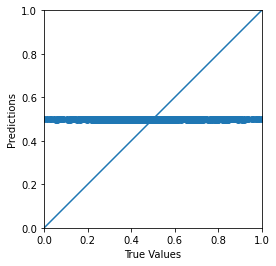

In [55]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, ridge.predict(X_1_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [56]:
train_results['Ridge Regression'] = (r2_score(y_1_train, ridge.predict(X_1_train)), 
                                  mean_absolute_error(y_1_train, ridge.predict(X_1_train)), 
                                  mean_squared_error(y_1_train, ridge.predict(X_1_train)), 
                                  np.sqrt(mean_squared_error(y_1_train, ridge.predict(X_1_train))))

In [57]:
test_results['Ridge Regression'] = (r2_score(y_1_test, ridge.predict(X_1_test)), 
                                    mean_absolute_error(y_1_test, ridge.predict(X_1_test)), 
                                    mean_squared_error(y_1_test, ridge.predict(X_1_test)),
                                    np.sqrt(mean_squared_error(y_1_test, ridge.predict(X_1_test))))

## RandomForestRegressor

In [58]:
rf = RandomForestRegressor(random_state= 42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse']
}
    
GSCV = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_1_train, y_1_train)
GSCV.best_params_

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] EN

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [59]:
rf = GSCV.best_estimator_
rf

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [60]:
rf = RandomForestRegressor(GSCV.best_params_)
rf

RandomForestRegressor(n_estimators={'criterion': 'mse', 'max_depth': 4,
                                    'max_features': 'sqrt',
                                    'n_estimators': 500})

In [61]:
rf = RandomForestRegressor(max_depth=4, max_features= 'sqrt', n_estimators=200, criterion= 'mse')

In [62]:
rf.fit(X_1_train, y_1_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=200)

In [63]:
rf.score(X_1_train, y_1_train)
rf.score(X_1_test, y_1_test)
print("Train score:", rf.score(X_1_train, y_1_train))
print("Test score:", rf.score(X_1_test, y_1_test))

Train score: 0.257094181577491
Test score: -0.020886631920067567


In [64]:
rf.predict(X_1_test)

array([0.4677971 , 0.51485881, 0.50890328, 0.49125819, 0.48093726,
       0.50231533, 0.49997158, 0.50764885, 0.50566115, 0.50348765,
       0.51704701, 0.52978246, 0.55287072, 0.512999  , 0.49936467,
       0.51036343, 0.46271881, 0.49739909, 0.55036492, 0.5379734 ,
       0.4900667 , 0.51913996, 0.50900855, 0.50239416, 0.52156533,
       0.46666149, 0.49445746, 0.4563505 , 0.50487875, 0.52740112,
       0.49464618, 0.47205673, 0.52236929, 0.5029457 , 0.47766633,
       0.50814758, 0.48932361, 0.47124116, 0.47216597, 0.51107805,
       0.51988446, 0.48301838, 0.46697971, 0.51138707, 0.47679504,
       0.51794524, 0.49979278, 0.47252528, 0.48826958, 0.50943503,
       0.51589539, 0.49449764, 0.49032727, 0.5005178 , 0.51189777,
       0.48132675, 0.47006967, 0.58810369, 0.49999692, 0.51677786,
       0.51713491, 0.4687819 , 0.49132218, 0.48091181, 0.4978305 ,
       0.49528727, 0.42579521, 0.48927609, 0.52030761, 0.46670274,
       0.48501552, 0.49319027, 0.49080754, 0.46676918, 0.53299

In [65]:
np.mean((y_1_test - np.mean(y_1_test))*(y_1_test - np.mean(y_1_test)))

0.03741359751577873

In [66]:
np.mean((y_1_test - rf.predict(X_1_test))*(y_1_test - rf.predict(X_1_test)))

0.03819504155589632

In [67]:
R2 = r2_score(y_1_train, rf.predict(X_1_train))
MAE = mean_absolute_error(y_1_train, rf.predict(X_1_train))
MSE = mean_squared_error(y_1_train, rf.predict(X_1_train))
RMSE = np.sqrt(mean_squared_error(y_1_train, rf.predict(X_1_train)))

In [68]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.2571, MAE: 0.1312, MSE: 0.0257, RMSE: 0.1604


In [69]:
R2 = r2_score(y_1_test, rf.predict(X_1_test))
MAE = mean_absolute_error(y_1_test, rf.predict(X_1_test))
MSE = mean_squared_error(y_1_test, rf.predict(X_1_test))
RMSE = np.sqrt(mean_squared_error(y_1_test, rf.predict(X_1_test)))

In [70]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0209, MAE: 0.1562, MSE: 0.0382, RMSE: 0.1954


Визуализируем результат сравнения тестовых и предсказанных значений

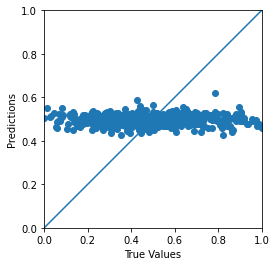

In [71]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, rf.predict(X_1_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [72]:
train_results['RandomForestRegressor'] = (r2_score(y_1_train, rf.predict(X_1_train)), 
                                  mean_absolute_error(y_1_train, rf.predict(X_1_train)), 
                                  mean_squared_error(y_1_train, rf.predict(X_1_train)), 
                                  np.sqrt(mean_squared_error(y_1_train, rf.predict(X_1_train))))

In [73]:
test_results['RandomForestRegressor'] = (r2_score(y_1_test, rf.predict(X_1_test)),
                                         mean_absolute_error(y_1_test, rf.predict(X_1_test)),
                                         mean_squared_error(y_1_test, rf.predict(X_1_test)),
                                         np.sqrt(mean_squared_error(y_1_test, rf.predict(X_1_test))))

## GradientBoostingRegressor

In [74]:
GBR = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 1],
    'random_state': [42]
}

GSCV = GridSearchCV(estimator=GBR, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_1_train, y_1_train)
GSCV.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'random_state': 42}

In [75]:
GBR = GSCV.best_estimator_
GBR

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=42)

In [76]:
GSCV.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'random_state': 42}

In [77]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42, learning_rate=0.01)                          

In [78]:
GBR.fit(X_1_train, y_1_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=42)

In [79]:
GBR.score(X_1_train, y_1_train)
GBR.score(X_1_test, y_1_test)
print("Train score:", GBR.score(X_1_train, y_1_train))
print("Test score:", GBR.score(X_1_test, y_1_test))

Train score: 0.25004147408167243
Test score: -0.02822884029732098


In [80]:
GBR.predict(X_1_test)

array([0.48189341, 0.52622584, 0.51690695, 0.50591239, 0.47967798,
       0.50968084, 0.50234033, 0.52288917, 0.50057349, 0.48665847,
       0.52163017, 0.5385762 , 0.55850237, 0.53660155, 0.53137727,
       0.51248665, 0.47104022, 0.50344635, 0.54256261, 0.52810228,
       0.52269592, 0.51690695, 0.5002132 , 0.51454725, 0.53923001,
       0.44253585, 0.48491442, 0.47104022, 0.5081179 , 0.48939065,
       0.48609933, 0.4704904 , 0.53563159, 0.50231749, 0.45850129,
       0.52525205, 0.50661092, 0.47923047, 0.48629824, 0.4688762 ,
       0.53393754, 0.49750775, 0.47327468, 0.52622584, 0.49348746,
       0.52054603, 0.51432855, 0.50509636, 0.47905038, 0.48484437,
       0.53679985, 0.54314512, 0.45835707, 0.48652855, 0.5310092 ,
       0.49158034, 0.49227518, 0.61166364, 0.49345421, 0.47214431,
       0.50455501, 0.47268197, 0.54281207, 0.50767201, 0.50407799,
       0.49507447, 0.36658095, 0.45985598, 0.5158012 , 0.46253757,
       0.47739639, 0.46439332, 0.50626091, 0.47196742, 0.52357

In [81]:
np.mean((y_1_test - np.mean(y_1_test))*(y_1_test - np.mean(y_1_test)))

0.03741359751577873

In [82]:
np.mean((y_1_test - GBR.predict(X_1_test))*(y_1_test - GBR.predict(X_1_test)))

0.03846973998499991

In [83]:
R2 = r2_score(y_1_train, GBR.predict(X_1_train))
MAE = mean_absolute_error(y_1_train, GBR.predict(X_1_train))
MSE = mean_squared_error(y_1_train, GBR.predict(X_1_train))
RMSE = np.sqrt(mean_squared_error(y_1_train, GBR.predict(X_1_train)))

In [84]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.2500, MAE: 0.1308, MSE: 0.0260, RMSE: 0.1611


In [85]:
R2 = r2_score(y_1_test, GBR.predict(X_1_test))
MAE = mean_absolute_error(y_1_test, GBR.predict(X_1_test))
MSE = mean_squared_error(y_1_test, GBR.predict(X_1_test))
RMSE = np.sqrt(mean_squared_error(y_1_test, GBR.predict(X_1_test)))

In [86]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0282, MAE: 0.1563, MSE: 0.0385, RMSE: 0.1961


Визуализируем результат сравнения тестовых и предсказанных значений

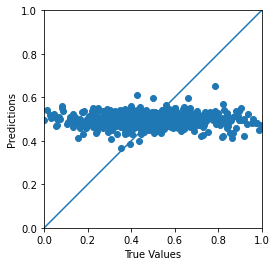

In [87]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, GBR.predict(X_1_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [88]:
train_results['GradientBoostingRegressor'] = (r2_score(y_1_train, GBR.predict(X_1_train)), 
                                  mean_absolute_error(y_1_train, GBR.predict(X_1_train)), 
                                  mean_squared_error(y_1_train, GBR.predict(X_1_train)), 
                                  np.sqrt(mean_squared_error(y_1_train, GBR.predict(X_1_train))))

In [89]:
test_results['GradientBoostingRegressor'] = (r2_score(y_1_test, GBR.predict(X_1_test)),
                                             mean_absolute_error(y_1_test, GBR.predict(X_1_test)),
                                             mean_squared_error(y_1_test, GBR.predict(X_1_test)),
                                             np.sqrt(mean_squared_error(y_1_test, GBR.predict(X_1_test))))

## Lasso

In [90]:
lso = Lasso(alpha=5)

param_grid = {
   'alpha': [0.01, 1, 100]
}

GSCV = GridSearchCV(estimator=lso, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_1_train, y_1_train)
GSCV.best_params_ 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .......................................

{'alpha': 0.01}

In [91]:
lso = GSCV.best_estimator_
lso

Lasso(alpha=0.01)

In [92]:
GSCV.best_params_

{'alpha': 0.01}

In [93]:
lso = Lasso(alpha=0.01)

In [94]:
lso.fit(X_1_train, y_1_train)

Lasso(alpha=0.01)

In [95]:
lso.score(X_1_train, y_1_train)
lso.score(X_1_test, y_1_test)
print("Train score:", lso.score(X_1_train, y_1_train))
print("Test score:", lso.score(X_1_test, y_1_test))

Train score: 0.0
Test score: -0.005488435085414078


In [96]:
lso.predict(X_1_test)

array([0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746, 0.4986746,
       0.4986746, 0.4986746, 0.4986746, 0.4986746, 

In [97]:
np.mean((y_1_test - np.mean(y_1_test))* (y_1_test - np.mean(y_1_test)))

0.03741359751577873

In [98]:
np.mean((y_1_test - lso.predict(X_1_test))*(y_1_test - lso.predict(X_1_test)))

0.0376189396170559

In [99]:
R2 = r2_score(y_1_train, lso.predict(X_1_train))
MAE = mean_absolute_error(y_1_train, lso.predict(X_1_train))
MSE = mean_squared_error(y_1_train, lso.predict(X_1_train))
RMSE = np.sqrt(mean_squared_error(y_1_train, lso.predict(X_1_train)))

In [100]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0000, MAE: 0.1510, MSE: 0.0346, RMSE: 0.1861


In [101]:
R2 = r2_score(y_1_test, lso.predict(X_1_test))
MAE = mean_absolute_error(y_1_test, lso.predict(X_1_test))
MSE = mean_squared_error(y_1_test, lso.predict(X_1_test))
RMSE = np.sqrt(mean_squared_error(y_1_test, lso.predict(X_1_test)))

In [102]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0055, MAE: 0.1563, MSE: 0.0376, RMSE: 0.1940


Визуализируем результат сравнения тестовых и предсказанных значений

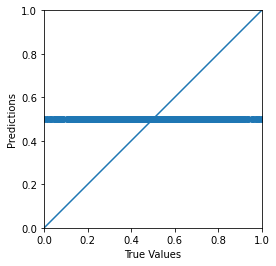

In [103]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, lso.predict(X_1_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [104]:
train_results['Lasso'] = (r2_score(y_1_train, lso.predict(X_1_train)), 
                                  mean_absolute_error(y_1_train, lso.predict(X_1_train)), 
                                  mean_squared_error(y_1_train, lso.predict(X_1_train)), 
                                  np.sqrt(mean_squared_error(y_1_train, lso.predict(X_1_train))))

In [105]:
test_results['Lasso'] = (r2_score(y_1_test, lso.predict(X_1_test)), 
                         mean_absolute_error(y_1_test, lso.predict(X_1_test)),
                         mean_squared_error(y_1_test, lso.predict(X_1_test)),
                         np.sqrt(mean_squared_error(y_1_test, lso.predict(X_1_test))))

## KNeighborsRegressor

In [106]:
KNN = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 2, 6, 15, 30, 50, 70]
}

GSCV = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_1_train, y_1_train)
GSCV.best_params_ 

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 70}

In [107]:
KNN = GSCV.best_estimator_
KNN

KNeighborsRegressor(n_neighbors=70)

In [108]:
KNN = KNeighborsRegressor(n_neighbors=50)

In [109]:
KNN.fit(X_1_train, y_1_train)

KNeighborsRegressor(n_neighbors=50)

In [110]:
KNN.score(X_1_train, y_1_train)
KNN.score(X_1_test, y_1_test)
print("Train score:", KNN.score(X_1_train, y_1_train))
print("Test score:", KNN.score(X_1_test, y_1_test))

Train score: 0.014198892490515314
Test score: -0.01387091942323182


In [111]:
KNN.predict(X_1_test)

array([0.49394521, 0.52117591, 0.51523112, 0.51412885, 0.51422555,
       0.49635165, 0.50543631, 0.55547813, 0.50537926, 0.46378739,
       0.49008032, 0.52245258, 0.47583018, 0.49615174, 0.49303365,
       0.49806313, 0.46269271, 0.50488262, 0.52840019, 0.48589511,
       0.50065635, 0.47535554, 0.47829156, 0.51302404, 0.49357972,
       0.4836269 , 0.50917658, 0.4835563 , 0.48648803, 0.52128759,
       0.52954853, 0.45241607, 0.48456212, 0.50505184, 0.46836278,
       0.51741287, 0.49963367, 0.47683667, 0.46771706, 0.50909352,
       0.48797683, 0.47878473, 0.52476173, 0.47983903, 0.51127475,
       0.51295036, 0.51400716, 0.51036569, 0.53145752, 0.47672847,
       0.47621509, 0.4886621 , 0.53441964, 0.50978278, 0.4955175 ,
       0.51157006, 0.48041378, 0.48470954, 0.44727866, 0.46891828,
       0.52486861, 0.51233748, 0.50912238, 0.50057049, 0.48625573,
       0.50412698, 0.53775054, 0.50738901, 0.49632079, 0.49556078,
       0.50390071, 0.51286283, 0.50238811, 0.53954873, 0.48158

In [112]:
np.mean((y_1_test - np.mean(y_1_test))* (y_1_test - np.mean(y_1_test)))

0.03741359751577873

In [113]:
np.mean((y_1_test - KNN.predict(X_1_test))*(y_1_test - KNN.predict(X_1_test)))

0.03793255851225333

In [114]:
R2 = r2_score(y_1_train, KNN.predict(X_1_train))
MAE = mean_absolute_error(y_1_train, KNN.predict(X_1_train))
MSE = mean_squared_error(y_1_train, KNN.predict(X_1_train))
RMSE = np.sqrt(mean_squared_error(y_1_train, KNN.predict(X_1_train)))

In [115]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0142, MAE: 0.1497, MSE: 0.0341, RMSE: 0.1848


In [116]:
R2 = r2_score(y_1_test, KNN.predict(X_1_test))
MAE = mean_absolute_error(y_1_test, KNN.predict(X_1_test))
MSE = mean_squared_error(y_1_test, KNN.predict(X_1_test))
RMSE = np.sqrt(mean_squared_error(y_1_test, KNN.predict(X_1_test)))

In [117]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0139, MAE: 0.1568, MSE: 0.0379, RMSE: 0.1948


Визуализируем результат сравнения тестовых и предсказанных значений

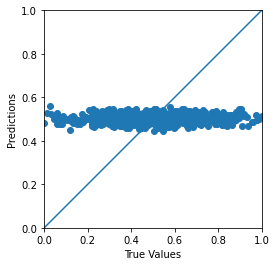

In [118]:
a = plt.axes(aspect='equal')
plt.scatter(y_1_test, KNN.predict(X_1_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [119]:
train_results['KNeighborsRegressor'] = (r2_score(y_1_train, KNN.predict(X_1_train)), 
                                  mean_absolute_error(y_1_train, KNN.predict(X_1_train)), 
                                  mean_squared_error(y_1_train, KNN.predict(X_1_train)), 
                                  np.sqrt(mean_squared_error(y_1_train, KNN.predict(X_1_train))))

In [120]:
test_results['KNeighborsRegressor'] = (r2_score(y_1_test, KNN.predict(X_1_test)),
                                       mean_absolute_error(y_1_test, KNN.predict(X_1_test)),
                                       mean_squared_error(y_1_test, KNN.predict(X_1_test)),
                                       np.sqrt(mean_squared_error(y_1_test, KNN.predict(X_1_test))))

Сводные таблицы по результатам оценки моделей метриками R^2, MAE, MSE, RMSE для "Модуля упругости при растяжении, ГПа"

In [121]:
train_results =  pd.DataFrame(train_results, index=['R^2', 'MAE', 'MSE', 'RMSE']).T
train_results

R^2       MAE       MSE      RMSE
LinearRegression           0.025479  0.147977  0.033745  0.183697
Ridge Regression           0.000929  0.150877  0.034595  0.185997
RandomForestRegressor      0.257094  0.131173  0.025725  0.160389
GradientBoostingRegressor  0.250041  0.130790  0.025969  0.161148
Lasso                      0.000000  0.150957  0.034627  0.186083
KNeighborsRegressor        0.014199  0.149678  0.034135  0.184758

In [122]:
test_results = pd.DataFrame(test_results, index=['R^2', 'MAE', 'MSE', 'RMSE']).T
test_results

R^2       MAE       MSE      RMSE
LinearRegression          -0.015459  0.155975  0.037992  0.194915
Ridge Regression          -0.005262  0.156243  0.037610  0.193934
RandomForestRegressor     -0.020887  0.156167  0.038195  0.195436
GradientBoostingRegressor -0.028229  0.156278  0.038470  0.196137
Lasso                     -0.005488  0.156252  0.037619  0.193956
KNeighborsRegressor       -0.013871  0.156772  0.037933  0.194763

# Модели регрессионного анализа для "Прочности при растяжении, МПа"

Разделим данные на обучающую, тестовую




In [123]:
df2 = df_nm.copy()

In [124]:
X_2 = df2.drop(['Прочность при растяжении, МПа'], axis=1)
y_2 = df2['Прочность при растяжении, МПа']

In [125]:
y_2

0      0.712590
1      0.712590
2      0.712590
3      0.712590
4      0.712590
         ...   
931    0.463043
932    0.452087
933    0.575296
934    0.334513
935    0.654075
Name: Прочность при растяжении, МПа, Length: 936, dtype: float64

In [126]:
X_2_test, X_2_train, y_2_test, y_2_train = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [127]:
print("Размер тренировочного датасета на входе:", X_2_train.shape)
print("Размер тестового датасета на входе:", X_2_test.shape)
print("Размер тренировочного датасета на выходе:", y_2_train.shape)
print("Размер тестового датасета на выходе:", y_2_test.shape)

Размер тренировочного датасета на входе: (281, 12)
Размер тестового датасета на входе: (655, 12)
Размер тренировочного датасета на выходе: (281,)
Размер тестового датасета на выходе: (655,)


Сформируем модель, которая всегда выдает среднее значение по тестовой выборке

In [128]:
np.mean((y_2_test - np.mean(y_2_test))*(y_2_test - np.mean(y_2_test)))

0.03611842010929816

## LinearRegression

In [129]:
lreg_str = LinearRegression()

In [130]:
lreg_str.fit(X_2_train, y_2_train)

LinearRegression()

In [131]:
lreg_str.score(X_2_train, y_2_train)
lreg_str.score(X_2_test, y_2_test)
print("Train score:", lreg_str.score(X_2_train, y_2_train))
print("Test score:", lreg_str.score(X_2_test, y_2_test))

Train score: 0.06446395732418941
Test score: -0.10130899176078989


In [132]:
lreg_str.predict(X_2_test)

array([0.53571553, 0.50058069, 0.46250398, 0.59198027, 0.50585617,
       0.58205679, 0.5238304 , 0.50166806, 0.53341314, 0.45348531,
       0.49966265, 0.5911618 , 0.60952503, 0.51378068, 0.55649452,
       0.53970416, 0.49443638, 0.53353695, 0.56062147, 0.44963108,
       0.51115547, 0.47603114, 0.47333728, 0.53396681, 0.52573586,
       0.47948687, 0.52454802, 0.46279826, 0.51738864, 0.48501274,
       0.5321071 , 0.49451242, 0.45613262, 0.4956326 , 0.41962351,
       0.55567331, 0.48013531, 0.50534275, 0.50017033, 0.49305762,
       0.54934194, 0.48060196, 0.62560741, 0.55472055, 0.60137128,
       0.49439321, 0.52525888, 0.51817284, 0.53874875, 0.47226672,
       0.48291108, 0.5421203 , 0.58383426, 0.57784099, 0.51647386,
       0.547552  , 0.48759237, 0.54401941, 0.47843718, 0.45284615,
       0.48943173, 0.62384024, 0.59807983, 0.50934792, 0.57034576,
       0.54348264, 0.65781681, 0.51467312, 0.62298755, 0.50508657,
       0.57191611, 0.58733946, 0.54746968, 0.49427253, 0.45792

In [133]:
np.mean((y_2_test - np.mean(y_2_test))*(y_2_test - np.mean(y_2_test)))

0.03611842010929816

In [134]:
np.mean((y_2_test - lreg_str.predict(X_2_test))*(y_2_test - lreg_str.predict(X_2_test)))

0.0397775408345638

In [135]:
R2 = r2_score(y_2_train, lreg_str.predict(X_1_train))
MAE = mean_absolute_error(y_2_train, lreg_str.predict(X_2_train))
MSE = mean_squared_error(y_2_train, lreg_str.predict(X_2_train))
RMSE = np.sqrt(mean_squared_error(y_2_train, lreg_str.predict(X_2_train)))

In [136]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0702, MAE: 0.1414, MSE: 0.0317, RMSE: 0.1780


In [137]:
R2 = r2_score(y_2_test, lreg_str.predict(X_2_test))
MAE = mean_absolute_error(y_2_test, lreg_str.predict(X_2_test))
MSE = mean_squared_error(y_2_test, lreg_str.predict(X_2_test))
RMSE = np.sqrt(mean_squared_error(y_2_test, lreg_str.predict(X_2_test)))

In [138]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.1013, MAE: 0.1612, MSE: 0.0398, RMSE: 0.1994


Визуализируем результат сравнения тестовых и предсказанных значений

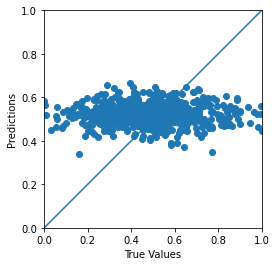

In [139]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, lreg_str.predict(X_2_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [140]:
train_results_str={}
train_results_str['LinearRegression'] = (r2_score(y_2_train, lreg_str.predict(X_2_train)),
                                        mean_absolute_error(y_2_train, lreg_str.predict(X_2_train)),
                                        mean_squared_error(y_2_train, lreg_str.predict(X_2_train)),
                                        np.sqrt(mean_squared_error(y_2_train, lreg_str.predict(X_2_train))))

In [141]:
test_results_str={}
test_results_str['LinearRegression'] = (r2_score(y_2_test, lreg_str.predict(X_2_test)),
                                        mean_absolute_error(y_2_test, lreg_str.predict(X_2_test)),
                                        mean_squared_error(y_2_test, lreg_str.predict(X_2_test)),
                                        np.sqrt(mean_squared_error(y_2_test, lreg_str.predict(X_2_test))))

## Ridge Regression

In [142]:
ridge_str = Ridge(alpha=3)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

GSCV = GridSearchCV(estimator=ridge_str, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_2_train, y_2_train)
GSCV.best_params_

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .......................................

{'alpha': 1000}

In [143]:
ridge_str = GSCV.best_estimator_
ridge_str

Ridge(alpha=1000)

In [144]:
ridge_str = Ridge(alpha=1000)

In [145]:
ridge_str.fit(X_2_train, y_2_train)

Ridge(alpha=1000)

In [146]:
ridge_str.score(X_2_train, y_2_train)
ridge_str.score(X_2_test, y_2_test)
print("Train score:", ridge_str.score(X_2_train, y_2_train))
print("Test score:", ridge_str.score(X_2_test, y_2_test))

Train score: 0.0016850330344140296
Test score: -0.027895535717698206


In [147]:
ridge_str.predict(X_2_test)

array([0.5178145 , 0.51834303, 0.51803036, 0.51934033, 0.51824945,
       0.51911111, 0.51856297, 0.51834748, 0.51872588, 0.51663813,
       0.51840301, 0.51790755, 0.51946466, 0.51846538, 0.51747878,
       0.51866835, 0.51699758, 0.51855431, 0.51772627, 0.51666699,
       0.51852753, 0.51689055, 0.51685494, 0.51725961, 0.51734389,
       0.5167516 , 0.51729971, 0.51662072, 0.51718473, 0.51815802,
       0.51871381, 0.51700001, 0.51681595, 0.5182914 , 0.51629519,
       0.51899492, 0.51667311, 0.51709219, 0.51700121, 0.51830295,
       0.51745151, 0.51680905, 0.51937903, 0.51880387, 0.51930148,
       0.5172201 , 0.51728521, 0.51718844, 0.51868996, 0.51689695,
       0.51690625, 0.51868284, 0.51924028, 0.51782201, 0.51720104,
       0.51872511, 0.51679887, 0.51883498, 0.51681558, 0.51650709,
       0.51825546, 0.51977641, 0.51928867, 0.5172385 , 0.51908653,
       0.51887001, 0.51852912, 0.51730951, 0.5196026 , 0.51847283,
       0.51912934, 0.51801255, 0.5188551 , 0.5182311 , 0.51645

In [148]:
np.mean((y_2_test - np.mean(y_2_test))*(y_2_test - np.mean(y_2_test)))

0.03611842010929816

In [149]:
np.mean((y_2_test - ridge_str.predict(X_2_test))*(y_2_test - ridge_str.predict(X_2_test)))

0.037125962787523885

In [150]:
R2 = r2_score(y_2_train, ridge_str.predict(X_1_train))
MAE = mean_absolute_error(y_2_train, ridge_str.predict(X_2_train))
MSE = mean_squared_error(y_2_train, ridge_str.predict(X_2_train))
RMSE = np.sqrt(mean_squared_error(y_2_train, ridge_str.predict(X_2_train)))

In [151]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0019, MAE: 0.1447, MSE: 0.0338, RMSE: 0.1838


In [152]:
R2 = r2_score(y_2_test, ridge_str.predict(X_2_test))
MAE = mean_absolute_error(y_2_test, ridge_str.predict(X_2_test))
MSE = mean_squared_error(y_2_test, ridge_str.predict(X_2_test))
RMSE = np.sqrt(mean_squared_error(y_2_test, ridge_str.predict(X_2_test)))

In [153]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0279, MAE: 0.1549, MSE: 0.0371, RMSE: 0.1927


Визуализируем результат сравнения тестовых и предсказанных значений

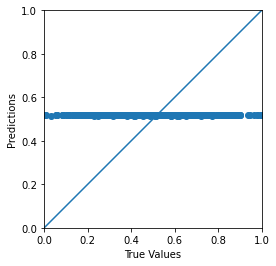

In [154]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, ridge_str.predict(X_2_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [155]:
train_results_str['Ridge Regression'] = (r2_score(y_2_train, ridge_str.predict(X_2_train)),
                                        mean_absolute_error(y_2_train, ridge_str.predict(X_2_train)),
                                        mean_squared_error(y_2_train, ridge_str.predict(X_2_train)),
                                        np.sqrt(mean_squared_error(y_2_train, ridge_str.predict(X_2_train))))

In [156]:
test_results_str['Ridge Regression'] = (r2_score(y_2_test, ridge_str.predict(X_2_test)),
                                        mean_absolute_error(y_2_test, ridge_str.predict(X_2_test)),
                                        mean_squared_error(y_2_test, ridge_str.predict(X_2_test)),
                                        np.sqrt(mean_squared_error(y_2_test, ridge_str.predict(X_2_test))))

## RandomForestRegressor

In [157]:
rf_str = RandomForestRegressor(random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 5, 6],
    'max_features': ['auto'],
    'criterion': ['mse']
}

GSCV = GridSearchCV(estimator=rf_str, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_2_train, y_2_train)
GSCV.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END criterion=mse, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV] END 

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [158]:
rf_str = GSCV.best_estimator_
rf_str

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=42)

In [159]:
rf_str = RandomForestRegressor(GSCV.best_params_)
rf_str

RandomForestRegressor(n_estimators={'criterion': 'mse', 'max_depth': 4,
                                    'max_features': 'auto',
                                    'n_estimators': 200})

In [160]:
rf_str = RandomForestRegressor(criterion='mse', max_depth=4, 
                           max_features='auto', n_estimators=200)

In [161]:
rf_str.fit(X_2_train, y_2_train)

RandomForestRegressor(max_depth=4, n_estimators=200)

In [162]:
rf_str.score(X_2_train, y_2_train)
rf_str.score(X_2_test, y_2_test)
print("Train score:", rf_str.score(X_2_train, y_2_train))
print("Test score:", rf_str.score(X_2_test, y_2_test))

Train score: 0.35031310576448715
Test score: -0.06639087976899849


In [163]:
rf_str.predict(X_2_test)

array([0.52364612, 0.48349209, 0.47255029, 0.58008736, 0.51719289,
       0.56588033, 0.49492133, 0.48311879, 0.50313285, 0.47406685,
       0.54077444, 0.56266656, 0.53423156, 0.47897785, 0.56166539,
       0.54807657, 0.43465741, 0.55040065, 0.50581393, 0.50612443,
       0.49411263, 0.52405767, 0.48365327, 0.49960149, 0.54587092,
       0.49337098, 0.56743692, 0.4858832 , 0.49903284, 0.48449239,
       0.54839412, 0.532011  , 0.49209969, 0.47983317, 0.46638183,
       0.57891107, 0.4945671 , 0.505292  , 0.51055192, 0.55138128,
       0.53875736, 0.43418677, 0.56196544, 0.57263818, 0.54060865,
       0.48625103, 0.50426287, 0.54618991, 0.54961317, 0.49883719,
       0.5247931 , 0.56625182, 0.53911335, 0.48869691, 0.48885325,
       0.55606008, 0.53170364, 0.54927931, 0.50477381, 0.48900349,
       0.48820527, 0.55738584, 0.55501199, 0.46977017, 0.52790921,
       0.5417015 , 0.55506542, 0.51505508, 0.56082978, 0.4667489 ,
       0.48106349, 0.55557743, 0.53934769, 0.56032035, 0.43588

In [164]:
np.mean((y_2_test - np.mean(y_2_test))*(y_2_test - np.mean(y_2_test)))

0.03611842010929816

In [165]:
np.mean((y_2_test - rf_str.predict(X_2_test))*(y_2_test - rf_str.predict(X_2_test)))

0.03851635379622076

In [166]:
R2 = r2_score(y_2_train, rf_str.predict(X_1_train))
MAE = mean_absolute_error(y_2_train, rf_str.predict(X_2_train))
MSE = mean_squared_error(y_2_train, rf_str.predict(X_2_train))
RMSE = np.sqrt(mean_squared_error(y_2_train, rf_str.predict(X_2_train)))

In [167]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.3087, MAE: 0.1200, MSE: 0.0220, RMSE: 0.1483


In [168]:
R2 = r2_score(y_2_test, rf_str.predict(X_2_test))
MAE = mean_absolute_error(y_2_test, rf_str.predict(X_2_test))
MSE = mean_squared_error(y_2_test, rf_str.predict(X_2_test))
RMSE = np.sqrt(mean_squared_error(y_2_test, rf_str.predict(X_2_test)))

In [169]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0664, MAE: 0.1565, MSE: 0.0385, RMSE: 0.1963


Визуализируем результат сравнения тестовых и предсказанных значений

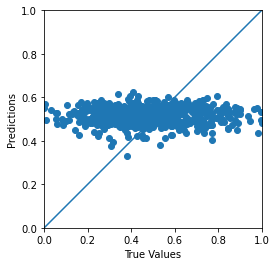

In [170]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, rf_str.predict(X_2_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [171]:
train_results_str['RandomForestRegressor'] = (r2_score(y_2_train, rf_str.predict(X_2_train)),
                                        mean_absolute_error(y_2_train, rf_str.predict(X_2_train)),
                                        mean_squared_error(y_2_train, rf_str.predict(X_2_train)),
                                        np.sqrt(mean_squared_error(y_2_train, rf_str.predict(X_2_train))))

In [172]:
test_results_str['RandomForestRegressor'] = (r2_score(y_2_test,rf_str.predict(X_2_test)),
                                             mean_absolute_error(y_2_test, rf_str.predict(X_2_test)),
                                             mean_squared_error(y_2_test, rf_str.predict(X_2_test)),
                                             np.sqrt(mean_squared_error(y_2_test, rf_str.predict(X_2_test))))

## GradientBoostingRegressor

In [173]:
GBR_str = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 1],
    'random_state': [42]
}

GSCV = GridSearchCV(estimator=GBR_str, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_2_train, y_2_train)
GSCV.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, random_state=

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'random_state': 42}

In [174]:
GBR_str = GSCV.best_estimator_
GBR_str

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=42)

In [175]:
GSCV.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'random_state': 42}

In [176]:
GBR_str = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                                    max_depth=4, random_state=42)                          

In [177]:
GBR_str.fit(X_2_train, y_2_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=42)

In [178]:
GBR_str.score(X_2_train, y_2_train)
GBR_str.score(X_2_test, y_2_test)
print("Train score:", GBR_str.score(X_2_train, y_2_train))
print("Test score:", GBR_str.score(X_2_test, y_2_test))

Train score: 0.3774898394992917
Test score: -0.06918936438728052


In [179]:
GBR_str.predict(X_2_test)

array([0.56173648, 0.45705318, 0.46479786, 0.55004883, 0.51933034,
       0.52142601, 0.50731026, 0.51056028, 0.50837626, 0.50926954,
       0.59675047, 0.56094543, 0.50621011, 0.44890858, 0.56024708,
       0.55051703, 0.42009724, 0.57181817, 0.49671883, 0.49480897,
       0.43468827, 0.53313333, 0.51296247, 0.43134593, 0.528129  ,
       0.50503614, 0.55847978, 0.48388843, 0.48550731, 0.47011651,
       0.54254783, 0.53779474, 0.52273764, 0.44855453, 0.5041473 ,
       0.55567929, 0.53085748, 0.47900301, 0.52287409, 0.56247283,
       0.54073739, 0.44354493, 0.57835949, 0.56252657, 0.5185227 ,
       0.45721582, 0.50854731, 0.54594645, 0.53909725, 0.5489626 ,
       0.51426371, 0.57787355, 0.52906905, 0.52468373, 0.50665074,
       0.53702512, 0.54939838, 0.51243382, 0.51572019, 0.50498958,
       0.48285904, 0.53604744, 0.55097439, 0.44775131, 0.55080687,
       0.51809201, 0.55375065, 0.54667766, 0.52291308, 0.50844615,
       0.44055332, 0.55146344, 0.50684846, 0.53933849, 0.48280

In [180]:
np.mean((y_2_test - np.mean(y_2_test))*(y_2_test - np.mean(y_2_test)))

0.03611842010929816

In [181]:
np.mean((y_2_test - GBR_str.predict(X_2_test))*(y_2_test - GBR_str.predict(X_2_test)))

0.03861743063933327

In [182]:
R2 = r2_score(y_2_train, GBR_str.predict(X_1_train))
MAE = mean_absolute_error(y_2_train, GBR_str.predict(X_2_train))
MSE = mean_squared_error(y_2_train, GBR_str.predict(X_2_train))
RMSE = np.sqrt(mean_squared_error(y_2_train, GBR_str.predict(X_2_train)))

In [183]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.3004, MAE: 0.1159, MSE: 0.0211, RMSE: 0.1452


In [184]:
R2 = r2_score(y_2_test, GBR_str.predict(X_2_test))
MAE = mean_absolute_error(y_2_test, GBR_str.predict(X_2_test))
MSE = mean_squared_error(y_2_test, GBR_str.predict(X_2_test))
RMSE = np.sqrt(mean_squared_error(y_2_test, GBR_str.predict(X_2_test)))

In [185]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0692, MAE: 0.1569, MSE: 0.0386, RMSE: 0.1965


Визуализируем результат сравнения тестовых и предсказанных значений

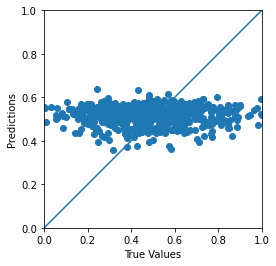

In [186]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, GBR_str.predict(X_2_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [187]:
train_results_str['GradientBoostingRegressor'] = (r2_score(y_2_train, GBR_str.predict(X_2_train)),
                                        mean_absolute_error(y_2_train, GBR_str.predict(X_2_train)),
                                        mean_squared_error(y_2_train, GBR_str.predict(X_2_train)),
                                        np.sqrt(mean_squared_error(y_2_train, GBR_str.predict(X_2_train))))

In [188]:
test_results_str['GradientBoostingRegressor'] = (r2_score(y_2_test, GBR_str.predict(X_2_test)),
                                                 mean_absolute_error(y_2_test, GBR_str.predict(X_2_test)),
                                                 mean_squared_error(y_2_test, GBR_str.predict(X_2_test)),
                                                 np.sqrt(mean_squared_error(y_2_test, GBR_str.predict(X_2_test))))

## Lasso

In [189]:
lso_str = Lasso(alpha=5)

param_grid = {
   'alpha': [0.01, 1, 100]
}

GSCV = GridSearchCV(estimator=lso_str, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_2_train, y_2_train)
GSCV.best_params_ 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .......................................

{'alpha': 1}

In [190]:
lso_str = GSCV.best_estimator_
lso_str

Lasso(alpha=1)

In [191]:
lso_str = Lasso(alpha=1)

In [192]:
lso_str.fit(X_2_train, y_2_train)

Lasso(alpha=1)

In [193]:
lso_str.score(X_2_train, y_2_train)
lso_str.score(X_2_test, y_2_test)
print("Train score:", lso_str.score(X_2_train, y_2_train))
print("Test score:", lso_str.score(X_2_test, y_2_test))

Train score: 0.0
Test score: -0.027814372574551438


In [194]:
lso_str.predict(X_2_test)

array([0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788579,
       0.51788579, 0.51788579, 0.51788579, 0.51788579, 0.51788

In [195]:
np.mean((y_2_test - np.mean(y_2_test))* (y_2_test - np.mean(y_2_test)))


0.03611842010929816

In [196]:
np.mean((y_2_test - lso_str.predict(X_2_test))*(y_2_test - lso_str.predict(X_2_test)))

0.03712303130302238

In [197]:
R2 = r2_score(y_2_train, lso_str.predict(X_1_train))
MAE = mean_absolute_error(y_2_train, lso_str.predict(X_2_train))
MSE = mean_squared_error(y_2_train, lso_str.predict(X_2_train))
RMSE = np.sqrt(mean_squared_error(y_2_train, lso_str.predict(X_2_train)))

In [198]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0000, MAE: 0.1448, MSE: 0.0339, RMSE: 0.1840


In [199]:
R2 = r2_score(y_2_test, lso_str.predict(X_2_test))
MAE = mean_absolute_error(y_2_test, lso_str.predict(X_2_test))
MSE = mean_squared_error(y_2_test, lso_str.predict(X_2_test))
RMSE = np.sqrt(mean_squared_error(y_2_test, lso_str.predict(X_2_test)))

In [200]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0278, MAE: 0.1548, MSE: 0.0371, RMSE: 0.1927


Визуализируем результат сравнения тестовых и предсказанных значений

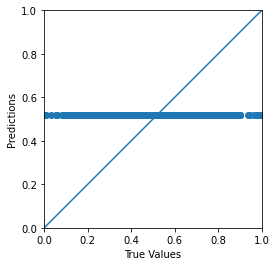

In [201]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, lso_str.predict(X_2_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [202]:
train_results_str['Lasso'] = (r2_score(y_2_train, lso_str.predict(X_2_train)),
                                        mean_absolute_error(y_2_train, lso_str.predict(X_2_train)),
                                        mean_squared_error(y_2_train, lso_str.predict(X_2_train)),
                                        np.sqrt(mean_squared_error(y_2_train, lso_str.predict(X_2_train))))

In [203]:
test_results_str['Lasso'] = (r2_score(y_2_test, lso_str.predict(X_2_test)),
                             mean_absolute_error(y_2_test, lso_str.predict(X_2_test)),
                             mean_squared_error(y_2_test, lso_str.predict(X_2_test)),
                             np.sqrt(mean_squared_error(y_2_test, lso_str.predict(X_2_test))))

## KNeighborsRegressor

In [204]:
KNN_str = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 2, 6, 15, 30, 70]
}

GSCV = GridSearchCV(estimator=KNN_str, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_2_train, y_2_train)
GSCV.best_params_ 

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 70}

In [205]:
KNN_str = GSCV.best_estimator_
KNN_str

KNeighborsRegressor(n_neighbors=70)

In [206]:
KNN_str = KNeighborsRegressor(n_neighbors=70)

In [207]:
KNN_str.fit(X_2_train, y_2_train)

KNeighborsRegressor(n_neighbors=70)

In [208]:
KNN_str.score(X_2_train, y_2_train)
KNN_str.score(X_2_test, y_2_test)
print("Train score:", KNN_str.score(X_2_train, y_2_train))
print("Test score:", KNN_str.score(X_2_test, y_2_test))

Train score: 0.012980491253599569
Test score: -0.04871673966101642


In [209]:
KNN_str.predict(X_2_test)

array([0.52095508, 0.51436683, 0.49455459, 0.53703306, 0.53437006,
       0.52732303, 0.52709928, 0.52972094, 0.52416559, 0.48857433,
       0.51464757, 0.51399583, 0.53540784, 0.53039853, 0.50559871,
       0.51764208, 0.51718411, 0.51101908, 0.51585166, 0.5106472 ,
       0.52653443, 0.52341269, 0.50623902, 0.52580997, 0.52009148,
       0.50101342, 0.5240593 , 0.51144253, 0.52036781, 0.5121206 ,
       0.53784236, 0.51478589, 0.49654224, 0.50330792, 0.501598  ,
       0.54239152, 0.5101347 , 0.51352653, 0.52432   , 0.52412491,
       0.52407965, 0.53284154, 0.53643057, 0.53305093, 0.54442155,
       0.51029331, 0.5363565 , 0.52926215, 0.51803311, 0.50297698,
       0.50726915, 0.51663842, 0.54652365, 0.5183099 , 0.53870562,
       0.54650658, 0.51761607, 0.54437446, 0.51335607, 0.50738861,
       0.52354337, 0.56009959, 0.53535002, 0.52535908, 0.54417268,
       0.5331786 , 0.53888092, 0.52542303, 0.55072496, 0.5418666 ,
       0.5173652 , 0.52507717, 0.55156111, 0.52418943, 0.50970

In [210]:
np.mean((y_2_test - np.mean(y_2_test))* (y_2_test - np.mean(y_2_test)))

0.03611842010929816

In [211]:
np.mean((y_2_test - KNN_str.predict(X_2_test))*(y_2_test - KNN_str.predict(X_2_test)))

0.03787799177873014

In [212]:
R2 = r2_score(y_2_train, KNN_str.predict(X_1_train))
MAE = mean_absolute_error(y_2_train, KNN_str.predict(X_2_train))
MSE = mean_squared_error(y_2_train, KNN_str.predict(X_2_train))
RMSE = np.sqrt(mean_squared_error(y_2_train, KNN_str.predict(X_2_train)))

In [213]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: 0.0212, MAE: 0.1439, MSE: 0.0334, RMSE: 0.1828


In [214]:
R2 = r2_score(y_2_test, KNN_str.predict(X_2_test))
MAE = mean_absolute_error(y_2_test, KNN_str.predict(X_2_test))
MSE = mean_squared_error(y_2_test, KNN_str.predict(X_2_test))
RMSE = np.sqrt(mean_squared_error(y_2_test, KNN_str.predict(X_2_test)))

In [215]:
print('R2: %.4f, MAE: %.4f, MSE: %.4f, RMSE: %.4f' % (R2, MAE, MSE, RMSE))

R2: -0.0487, MAE: 0.1567, MSE: 0.0379, RMSE: 0.1946


Визуализируем результат сравнения тестовых и предсказанных значений

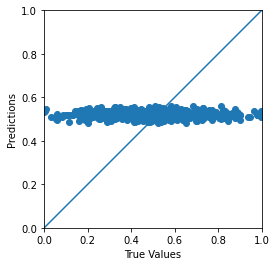

In [216]:
a = plt.axes(aspect='equal')
plt.scatter(y_2_test, KNN_str.predict(X_2_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [217]:
train_results_str['KNeighborsRegressor'] = (r2_score(y_2_train, KNN_str.predict(X_2_train)),
                                        mean_absolute_error(y_2_train, KNN_str.predict(X_2_train)),
                                        mean_squared_error(y_2_train, KNN_str.predict(X_2_train)),
                                        np.sqrt(mean_squared_error(y_2_train, KNN_str.predict(X_2_train))))

In [218]:
test_results_str['KNeighborsRegressor'] = (r2_score(y_2_test, KNN_str.predict(X_2_test)),
                                           mean_absolute_error(y_2_test, KNN_str.predict(X_2_test)),
                                           mean_squared_error(y_2_test, KNN_str.predict(X_2_test)),
                                           np.sqrt(mean_squared_error(y_2_test, KNN_str.predict(X_2_test))))

Сводные таблицы по результатам оценки моделей метриками R^2, MAE, MSE, RMSE для "Прочности при растяжении, МПа" 

In [219]:
train_results_str = pd.DataFrame(train_results_str, index=['R^2', 'MAE', 'MSE', 'RMSE']).T
train_results_str

R^2       MAE       MSE      RMSE
LinearRegression           0.064464  0.141408  0.031675  0.177974
Ridge Regression           0.001685  0.144699  0.033800  0.183849
RandomForestRegressor      0.350313  0.119975  0.021997  0.148313
GradientBoostingRegressor  0.377490  0.115887  0.021077  0.145178
Lasso                      0.000000  0.144845  0.033857  0.184004
KNeighborsRegressor        0.012980  0.143860  0.033418  0.182806

In [220]:
test_results_str = pd.DataFrame(test_results_str, index=['R^2', 'MAE', 'MSE', 'RMSE']).T
test_results_str

R^2       MAE       MSE      RMSE
LinearRegression          -0.101309  0.161214  0.039778  0.199443
Ridge Regression          -0.027896  0.154855  0.037126  0.192681
RandomForestRegressor     -0.066391  0.156503  0.038516  0.196256
GradientBoostingRegressor -0.069189  0.156942  0.038617  0.196513
Lasso                     -0.027814  0.154839  0.037123  0.192673
KNeighborsRegressor       -0.048717  0.156722  0.037878  0.194623

# Neural Network для признака "Соотношение матрица-наполнитель"

In [10]:
df3 = df.copy()

In [11]:
df3

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
5.0                            2.767918       2000.000000   
6.0                            2.569620       1910.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
1.0                738.736842                    50.000000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
5.0                748.000000                   111.860000   
6.0                807.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1.0                           23.750000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
5.0                           22.267857                284.615385   
6.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
5.0                        210.000000                             70.000000   
6.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
5.0                       3000.000000               220.000000   
6.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [12]:
df3.index = df3.index.astype('int')

In [13]:
X_nn = df3
y_nn = X_nn.pop('Соотношение матрица-наполнитель')

In [15]:
X_nn_test, X_nn_train, y_nn_test, y_nn_train = train_test_split(X_nn, y_nn, test_size=0.3, random_state=42)

In [16]:
print("Размер тренировочного датасета на входе:", X_nn_train.shape)
print("Размер тестового датасета на входе:", X_nn_test.shape)
print("Размер тренировочного датасета на выходе:", y_nn_train.shape)
print("Размер тестового датасета на выходе:", y_nn_test.shape)

Размер тренировочного датасета на входе: (281, 12)
Размер тестового датасета на входе: (655, 12)
Размер тренировочного датасета на выходе: (281,)
Размер тестового датасета на выходе: (655,)


## Построение линейной модели

In [17]:
mtrx_normalizer = layers.Normalization(axis=-1)
mtrx_normalizer.adapt(np.array(X_nn))

In [18]:
linear = tf.keras.Sequential([
    mtrx_normalizer,
    layers.Dense(units=1)
])

linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [19]:
linear.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
%%time
history = linear.fit(X_nn_train, 
                     y_nn_train, 
                     epochs=100, 
                     verbose=2, 
                     validation_split = 0.2)

Epoch 1/100
7/7 - 0s - loss: 2.6086 - val_loss: 2.2375 - 410ms/epoch - 59ms/step
Epoch 2/100
7/7 - 0s - loss: 1.9308 - val_loss: 1.7049 - 35ms/epoch - 5ms/step
Epoch 3/100
7/7 - 0s - loss: 1.2983 - val_loss: 1.1936 - 41ms/epoch - 6ms/step
Epoch 4/100
7/7 - 0s - loss: 0.8579 - val_loss: 0.8464 - 41ms/epoch - 6ms/step
Epoch 5/100
7/7 - 0s - loss: 0.7123 - val_loss: 0.8424 - 40ms/epoch - 6ms/step
Epoch 6/100
7/7 - 0s - loss: 0.7227 - val_loss: 0.8070 - 42ms/epoch - 6ms/step
Epoch 7/100
7/7 - 0s - loss: 0.7534 - val_loss: 0.7430 - 35ms/epoch - 5ms/step
Epoch 8/100
7/7 - 0s - loss: 0.7138 - val_loss: 0.7970 - 41ms/epoch - 6ms/step
Epoch 9/100
7/7 - 0s - loss: 0.6936 - val_loss: 0.7995 - 35ms/epoch - 5ms/step
Epoch 10/100
7/7 - 0s - loss: 0.6798 - val_loss: 0.8216 - 41ms/epoch - 6ms/step
Epoch 11/100
7/7 - 0s - loss: 0.7010 - val_loss: 0.8562 - 40ms/epoch - 6ms/step
Epoch 12/100
7/7 - 0s - loss: 0.6954 - val_loss: 0.7980 - 39ms/epoch - 6ms/step
Epoch 13/100
7/7 - 0s - loss: 0.6955 - val_loss

In [21]:
# Как шло обучение
hist_linear = pd.DataFrame(history.history) 
hist_linear['epoch'] = history.epoch
hist_linear.tail(5)

loss  val_loss  epoch
95  0.693233  0.803392     95
96  0.685104  0.811275     96
97  0.691908  0.808365     97
98  0.705330  0.815443     98
99  0.695370  0.788000     99

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

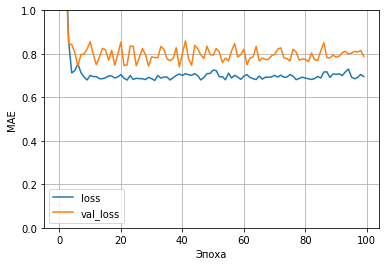

In [23]:
plot_loss(history)

In [24]:
linear.evaluate(X_nn_train, y_nn_train, verbose=2) 

9/9 - 0s - loss: 0.7009 - 24ms/epoch - 3ms/step


0.7008787393569946

In [25]:
linear.evaluate(X_nn_test, y_nn_test, verbose=2)

21/21 - 0s - loss: 0.7698 - 33ms/epoch - 2ms/step


0.7698411345481873

## Построение многослойного персептрона

In [26]:
mult = keras.Sequential([
    mtrx_normalizer,
    layers.Dense(64, activation ='relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])
    
mult.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                832       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

In [27]:
mult.compile(optimizer='adam',
             loss='mae',
             metrics=['mse'])

In [28]:
%%time
history = mult.fit(
    X_nn_train,
    y_nn_train,
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
7/7 - 1s - loss: 2.7979 - mse: 8.6205 - val_loss: 2.6752 - val_mse: 8.0320 - 535ms/epoch - 76ms/step
Epoch 2/100
7/7 - 0s - loss: 2.2596 - mse: 5.8719 - val_loss: 1.9892 - val_mse: 4.8758 - 37ms/epoch - 5ms/step
Epoch 3/100
7/7 - 0s - loss: 1.4377 - mse: 2.8294 - val_loss: 1.1283 - val_mse: 1.7949 - 44ms/epoch - 6ms/step
Epoch 4/100
7/7 - 0s - loss: 0.9171 - mse: 1.2502 - val_loss: 1.1001 - val_mse: 1.9207 - 39ms/epoch - 6ms/step
Epoch 5/100
7/7 - 0s - loss: 0.8756 - mse: 1.2127 - val_loss: 1.0049 - val_mse: 1.4641 - 32ms/epoch - 5ms/step
Epoch 6/100
7/7 - 0s - loss: 0.8135 - mse: 0.9562 - val_loss: 1.0343 - val_mse: 1.5501 - 39ms/epoch - 6ms/step
Epoch 7/100
7/7 - 0s - loss: 0.7676 - mse: 0.8821 - val_loss: 1.0017 - val_mse: 1.4691 - 39ms/epoch - 6ms/step
Epoch 8/100
7/7 - 0s - loss: 0.7103 - mse: 0.7884 - val_loss: 1.0349 - val_mse: 1.5745 - 38ms/epoch - 5ms/step
Epoch 9/100
7/7 - 0s - loss: 0.6927 - mse: 0.7742 - val_loss: 1.0193 - val_mse: 1.5180 - 39ms/epoch - 6ms/step

In [29]:
score_mult = mult.evaluate(X_nn_test, y_nn_test, verbose=2)
print('mae:', score_mult[0])
print('mse', score_mult[1])

21/21 - 0s - loss: 0.9303 - mse: 1.3279 - 36ms/epoch - 2ms/step
mae: 0.9303123950958252
mse 1.3279310464859009


In [30]:
# Как шло обучение
hist_mult = pd.DataFrame(history.history) 
hist_mult['epoch'] = history.epoch
hist_mult.tail(5)

loss       mse  val_loss   val_mse  epoch
95  0.073871  0.014329  0.952949  1.423463     95
96  0.062713  0.011957  0.957626  1.440175     96
97  0.068503  0.013475  0.953433  1.441063     97
98  0.058148  0.012088  0.940759  1.380944     98
99  0.068669  0.012280  0.947121  1.433568     99

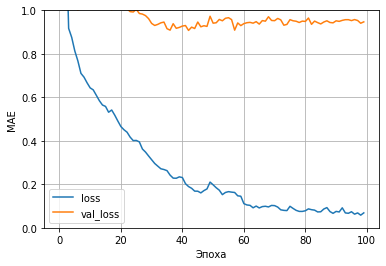

In [31]:
plot_loss(history)

## Добавление Dropout

In [80]:
mult_d = keras.Sequential([
    mtrx_normalizer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.06),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.06),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.06),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.06),
    layers.Dense(1)
])
    
mult_d.compile(optimizer='adam',
              loss='mae',
              metrics=['mse']) 
    
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)   
  
mult_d.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_41 (Dense)            (None, 64)                832       
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                      

In [81]:
%%time
history = mult_d.fit(
    X_nn_train,
    y_nn_train,
    epochs=100,
    verbose=2,
    validation_split = 0.2,
    callbacks=[tensorboard_callback])

Epoch 1/100
7/7 - 1s - loss: 2.7804 - mse: 8.5206 - val_loss: 2.5800 - val_mse: 7.5511 - 723ms/epoch - 103ms/step
Epoch 2/100
7/7 - 0s - loss: 2.1065 - mse: 5.3237 - val_loss: 1.8650 - val_mse: 4.3778 - 132ms/epoch - 19ms/step
Epoch 3/100
7/7 - 0s - loss: 1.2974 - mse: 2.3871 - val_loss: 1.0410 - val_mse: 1.7152 - 119ms/epoch - 17ms/step
Epoch 4/100
7/7 - 0s - loss: 0.9937 - mse: 1.5260 - val_loss: 1.0149 - val_mse: 1.5164 - 141ms/epoch - 20ms/step
Epoch 5/100
7/7 - 0s - loss: 0.9846 - mse: 1.5502 - val_loss: 0.9636 - val_mse: 1.4543 - 122ms/epoch - 17ms/step
Epoch 6/100
7/7 - 0s - loss: 0.8315 - mse: 1.0745 - val_loss: 0.9963 - val_mse: 1.5208 - 134ms/epoch - 19ms/step
Epoch 7/100
7/7 - 0s - loss: 0.7638 - mse: 0.9309 - val_loss: 0.9624 - val_mse: 1.3152 - 123ms/epoch - 18ms/step
Epoch 8/100
7/7 - 0s - loss: 0.7517 - mse: 0.9054 - val_loss: 0.9673 - val_mse: 1.3410 - 115ms/epoch - 16ms/step
Epoch 9/100
7/7 - 0s - loss: 0.7591 - mse: 0.9142 - val_loss: 0.9506 - val_mse: 1.3113 - 127ms/

In [82]:
score_mult_d = mult_d.evaluate(X_nn_test, y_nn_test, verbose=2)
print('mae:', score_mult_d[0])
print('mse', score_mult_d[1])

21/21 - 0s - loss: 0.8602 - mse: 1.1142 - 36ms/epoch - 2ms/step
mae: 0.8601845502853394
mse 1.1142224073410034


In [83]:
# Как шло обучение
hist_mult_d = pd.DataFrame(history.history) 
hist_mult_d['epoch'] = history.epoch
hist_mult_d.tail(5)

loss       mse  val_loss   val_mse  epoch
95  0.285605  0.165860  0.898793  1.298497     95
96  0.319796  0.192784  0.872051  1.261422     96
97  0.318757  0.174566  0.864281  1.234721     97
98  0.303925  0.163389  0.850257  1.182575     98
99  0.314405  0.172498  0.846829  1.172392     99

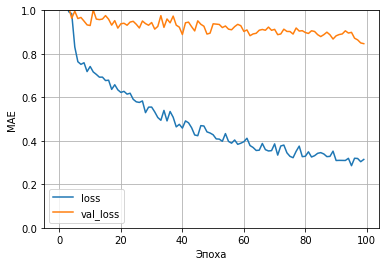

In [84]:
plot_loss(history)

In [85]:
# Предсказание
y_prediction = mult_d.predict(X_nn_test)

In [86]:
y_prediction

array([[3.0667984],
       [2.2910368],
       [2.7576582],
       [3.8759956],
       [2.191128 ],
       [3.548222 ],
       [2.942942 ],
       [2.375789 ],
       [2.4013093],
       [2.530664 ],
       [3.4163864],
       [2.3359244],
       [3.44189  ],
       [3.9110332],
       [2.18632  ],
       [2.8243392],
       [2.146353 ],
       [2.0468044],
       [2.852988 ],
       [2.555855 ],
       [4.0395365],
       [2.0954432],
       [2.5446017],
       [2.8444245],
       [2.8907835],
       [2.8653033],
       [1.9534395],
       [1.8213992],
       [2.4143808],
       [2.9781563],
       [2.57666  ],
       [1.5501974],
       [2.722009 ],
       [2.2006824],
       [2.51352  ],
       [4.6675854],
       [2.209296 ],
       [2.207108 ],
       [2.1801565],
       [3.1920063],
       [2.5002806],
       [2.609687 ],
       [2.7292328],
       [3.6607478],
       [2.7456896],
       [1.9462488],
       [3.577354 ],
       [2.4524307],
       [2.3864744],
       [4.8025656],


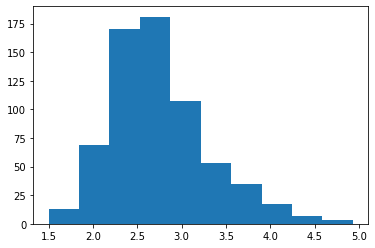

In [87]:
plt.hist(y_prediction);

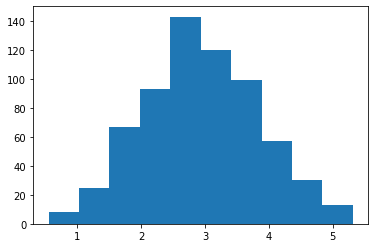

In [88]:
plt.hist(y_nn_test);

In [89]:
#Сохраним модель
mult_d.save("brainstorm_mlp")

INFO:tensorflow:Assets written to: brainstorm_mlp\assets
